<a href="https://colab.research.google.com/github/Arwin-K/Fake-News-Detection/blob/main/Stock_Price_Volatility_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


#Opening all .csv files (Research done on local system)

In [ ]:
# all penny stock files
cosmos_health = "/gdrive/MyDrive/research/penny_stocks/COSM.csv"
ecd_auto = "/gdrive/MyDrive/research/penny_stocks/ECDA.csv"
ocugen = "/gdrive/MyDrive/research/penny_stocks/OCGN.csv"
sirius_xm = "/gdrive/MyDrive/research/penny_stocks/SIRI.csv"
talkspace = "/gdrive/MyDrive/research/penny_stocks/TALK.csv"

In [ ]:
# all regular stock files
fedex = "/gdrive/MyDrive/research/regular_stocks/FDX.csv"
iqvia = "/gdrive/MyDrive/research/regular_stocks/IQV.csv"
goldman_sachs = "/gdrive/MyDrive/research/regular_stocks/GS.csv"
nvidia = "/gdrive/MyDrive/research/regular_stocks/NVDA.csv"
at_t = "/gdrive/MyDrive/research/regular_stocks/T.csv"

# ALL PENNY STOCKS

## Cosmos Health

In [ ]:
df_cosm = pd.read_csv(cosmos_health)
df_cosm.head()

Date   Open   High    Low  Close  Adj Close    Volume
0  2022-12-09  0.317  0.389  0.256  0.353      0.353  95449200
1  2022-12-12  0.355  0.380  0.305  0.332      0.332  33079400
2  2022-12-13  0.295  0.335  0.280  0.281      0.281  27221200
3  2022-12-14  0.268  0.340  0.238  0.320      0.320  56616300
4  2022-12-15  0.315  0.342  0.272  0.330      0.330  52128200

In [ ]:
df_cosm.shape

(389, 7)

In [ ]:
# Clean up dataset

df_cosm = df_cosm.drop(columns = "Adj Close")
df_cosm.head()

Date   Open   High    Low  Close    Volume
0  2022-12-09  0.317  0.389  0.256  0.353  95449200
1  2022-12-12  0.355  0.380  0.305  0.332  33079400
2  2022-12-13  0.295  0.335  0.280  0.281  27221200
3  2022-12-14  0.268  0.340  0.238  0.320  56616300
4  2022-12-15  0.315  0.342  0.272  0.330  52128200

In [ ]:
df_cosm.duplicated().values.any()

False

In [ ]:
df_cosm.isnull().values.any()

False

In [ ]:
df_cosm.describe()

Open        High         Low       Close        Volume
count  389.000000  389.000000  389.000000  389.000000  3.890000e+02
mean     2.109324    2.296648    1.996247    2.150272  2.491778e+06
std      1.598209    2.076314    1.485363    1.917667  1.104743e+07
min      0.268000    0.335000    0.238000    0.281000  1.450000e+04
25%      0.810000    0.850000    0.770000    0.807000  1.246000e+05
50%      1.280000    1.380000    1.200000    1.280000  2.900000e+05
75%      3.300000    3.450000    3.130000    3.260000  8.029000e+05
max      9.180000   23.840000    7.580000   23.010000  1.200317e+08

In [ ]:
specific_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
print(df_cosm[specific_columns].corr())
# more accurate with variables that are closer in correlation

            Open      High       Low     Close    Volume
Open    1.000000  0.868736  0.995676  0.853074  0.096873
High    0.868736  1.000000  0.852441  0.995324  0.390574
Low     0.995676  0.852441  1.000000  0.841867  0.066916
Close   0.853074  0.995324  0.841867  1.000000  0.380325
Volume  0.096873  0.390574  0.066916  0.380325  1.000000


<Axes: >

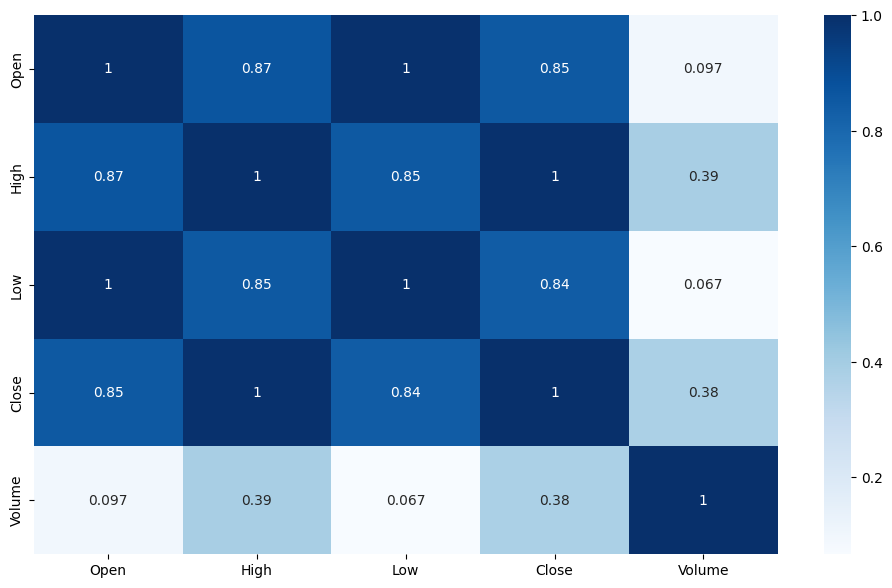

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df_cosm[specific_columns].corr(), cmap = 'Blues', annot = True)

In [ ]:
# See high correlations between: Open and Low & High and Close
# Volume has extremely low correlation

<Figure size 600x400 with 0 Axes>

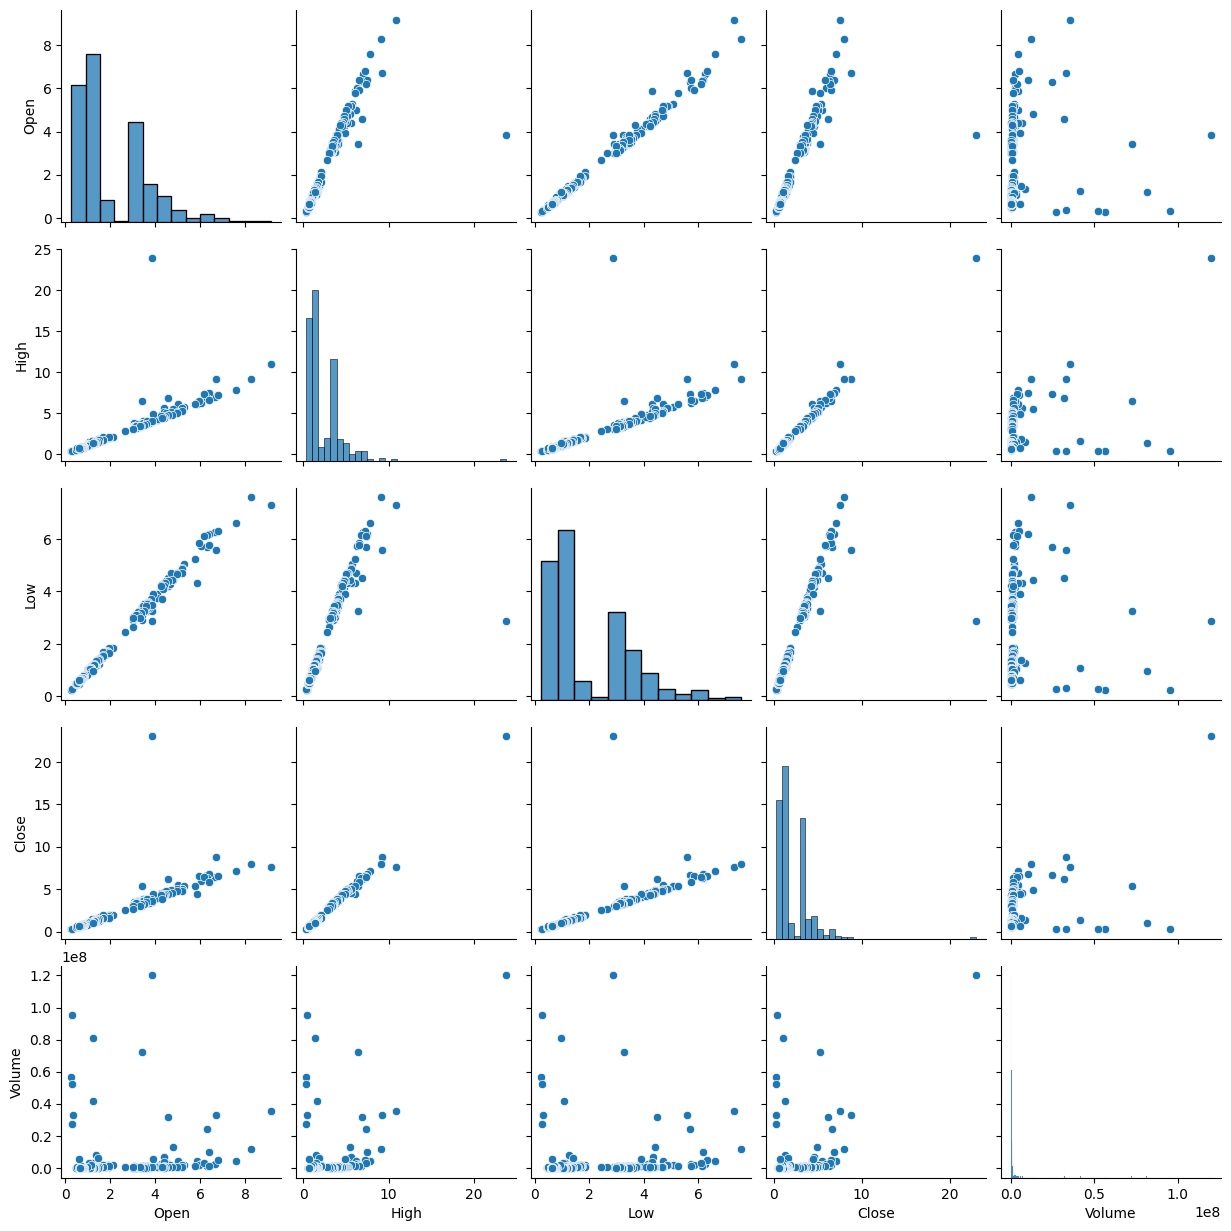

In [ ]:
plt.figure(figsize = (6,4))
sns.pairplot(df_cosm)

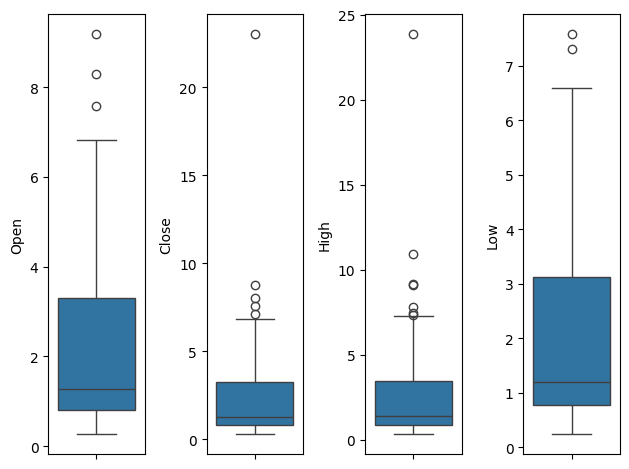

In [ ]:
# Box plots
f, axes = plt.subplots(1,4)
sns.boxplot( y = 'Open', data = df_cosm, ax = axes[0])
sns.boxplot( y = 'Close', data = df_cosm, ax = axes[1])
sns.boxplot( y = 'High', data = df_cosm, ax = axes[2])
sns.boxplot( y = 'Low', data = df_cosm, ax = axes[3])
plt.tight_layout()

In [ ]:
# presence of outliers is a lot greater when displayed in a boxplot (shows more volatility)

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data = [go.Candlestick(x=df_cosm['Date'],
                            open = df_cosm['Open'], close = df_cosm['Close'],
                           high = df_cosm['High'], low = df_cosm['Low'])])
figure.update_layout(title = 'Cosmos Stock Price Analysis', xaxis_rangeslider_visible = False)
figure.show()

### Cosmos train_test_split


In [ ]:
x_cosm = df_cosm[['Open', 'High', 'Low', 'Volume']]
y_cosm = df_cosm['Close']

In [ ]:
x_train_cosm = x_cosm.iloc[:311]
y_train_cosm = y_cosm.iloc[:311]
x_test_cosm = x_cosm.iloc[311:]
y_test_cosm = y_cosm.iloc[311:]

In [ ]:
print("train: ", x_train_cosm.shape)
print('test: ', x_test_cosm.shape)

train:  (311, 4)
test:  (78, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

In [ ]:
regressor_cosm = LinearRegression()

regressor_cosm = regressor_cosm.fit(x_train_cosm, y_train_cosm)

In [ ]:
y_pred_cosm = regressor_cosm.predict(x_test_cosm)

In [ ]:
y_pred_cosm.shape

(78,)

In [ ]:
print("Model Coefficients: ", regressor_cosm.coef_)
print("Model Intercept: ", regressor_cosm.intercept_)

Model Coefficients:  [-8.93794754e-01  1.01285449e+00  8.35337884e-01 -3.73285625e-09]
Model Intercept:  0.057650671955667754


### Cosmos Actual vs Predicted Values

In [ ]:
pd.set_option('display.max_rows', None)
dframe_cosm = pd.DataFrame(y_test_cosm, y_pred_cosm)
dfr_cosm = pd.DataFrame({'Actual Price': y_test_cosm, 'Predicted Price': y_pred_cosm})
print(dfr_cosm)

     Actual Price  Predicted Price
311         0.766         0.794707
312         0.785         0.788985
313         0.785         0.791889
314         0.762         0.787468
315         0.722         0.739404
316         0.740         0.850192
317         0.701         0.792457
318         0.676         0.735841
319         0.673         0.727419
320         0.621         0.759647
321         0.633         0.642748
322         0.659         0.694097
323         0.667         0.695777
324         0.710         0.714493
325         0.710         0.753064
326         0.700         0.724345
327         0.710         0.723662
328         0.695         0.709766
329         0.690         0.714239
330         0.693         0.735819
331         0.698         0.729471
332         0.690         0.695934
333         0.691         0.737184
334         0.728         0.747009
335         0.705         0.707507
336         0.650         0.666681
337         0.643         0.678256
338         0.630   

In [ ]:
dfr_cosm.describe()

Actual Price  Predicted Price
count     78.000000        78.000000
mean       0.679987         0.712328
std        0.070590         0.062337
min        0.484000         0.538869
25%        0.652250         0.690162
50%        0.687500         0.713612
75%        0.700000         0.739368
max        1.040000         0.904208

In [ ]:
# calculate linear regression confidence
regression_confidence = regressor_cosm.score(x_test_cosm, y_test_cosm)
print("Linear Regression Confidence: ", regression_confidence)

Linear Regression Confidence:  0.50108719067809


In [ ]:
import plotly.graph_objects as go

x_graph_comp_cosm = dfr_cosm.index
y1_graph_comp_cosm = dfr_cosm['Actual Price']
y2_graph_comp_cosm = dfr_cosm['Predicted Price']

trace1 = go.Scatter(x=x_graph_comp_cosm, y=y1_graph_comp_cosm, mode='lines',
                    name='Line 1', line=dict(color='red'))
trace2 = go.Scatter(x=x_graph_comp_cosm, y=y2_graph_comp_cosm, mode='lines',
                    name='Line 2', line=dict(color='blue'))

fig = go.Figure(data = [trace1, trace2])

fig.update_layout(
    title='Predicted Prices Compared to Actual Prices',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    title_x = 0.5,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    legend_title_text='Lines'
)

fig.show()

## Ocugen

In [ ]:
df_ocug = pd.read_csv(ocugen)
df_ocug.head()

Date  Open  High    Low  Close  Adj Close   Volume
0  2022-12-09  1.40  1.42  1.340   1.35       1.35  3096700
1  2022-12-12  1.33  1.49  1.320   1.47       1.47  4363500
2  2022-12-13  1.53  1.57  1.460   1.55       1.55  5217900
3  2022-12-14  1.54  1.62  1.508   1.59       1.59  3490900
4  2022-12-15  1.57  1.57  1.430   1.45       1.45  6873000

In [ ]:
df_ocug.shape

(389, 7)

In [ ]:
df_ocug = df_ocug.drop(columns = 'Adj Close')
df_ocug.head()

Date  Open  High    Low  Close   Volume
0  2022-12-09  1.40  1.42  1.340   1.35  3096700
1  2022-12-12  1.33  1.49  1.320   1.47  4363500
2  2022-12-13  1.53  1.57  1.460   1.55  5217900
3  2022-12-14  1.54  1.62  1.508   1.59  3490900
4  2022-12-15  1.57  1.57  1.430   1.45  6873000

In [ ]:
df_ocug.duplicated().values.any()

False

In [ ]:
df_ocug.isnull().values.any()

False

In [ ]:
df_ocug.describe()

Open        High         Low       Close        Volume
count  389.000000  389.000000  389.000000  389.000000  3.890000e+02
mean     0.860797    0.894486    0.821692    0.856414  5.854589e+06
std      0.443709    0.469049    0.416514    0.441781  6.177041e+06
min      0.354000    0.364000    0.345000    0.358000  6.285000e+05
25%      0.470000    0.475000    0.450000    0.465000  2.415100e+06
50%      0.710000    0.732000    0.685000    0.707000  4.409900e+06
75%      1.220000    1.280000    1.180000    1.240000  6.877100e+06
max      2.010000    2.105000    1.900000    1.980000  4.526780e+07

In [ ]:
print(df_ocug[specific_columns].corr())
# strong correlation between (high, open), (low, open), and (close, open)

            Open     High       Low     Close    Volume
Open    1.000000  0.99573  0.995982  0.991659  0.335214
High    0.995730  1.00000  0.995150  0.996440  0.362900
Low     0.995982  0.99515  1.000000  0.996265  0.304278
Close   0.991659  0.99644  0.996265  1.000000  0.329758
Volume  0.335214  0.36290  0.304278  0.329758  1.000000


<Axes: >

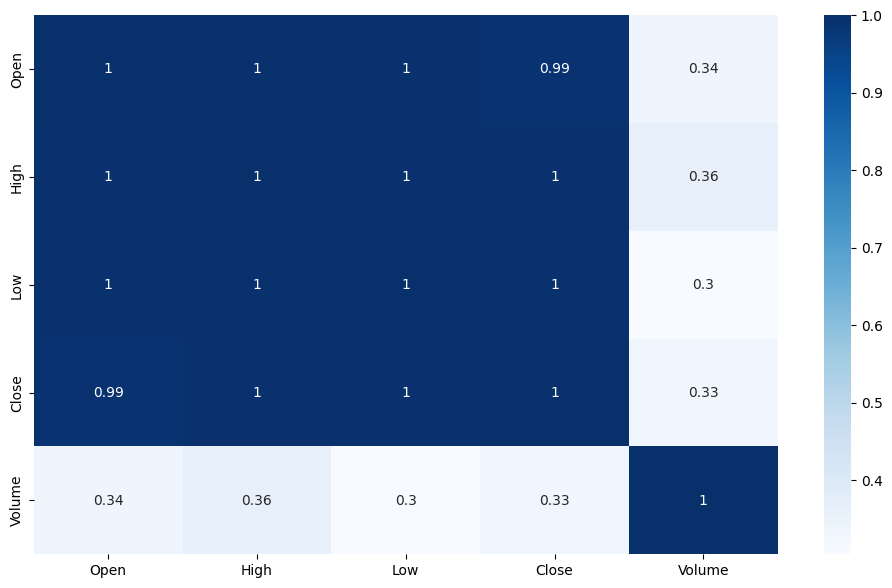

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df_ocug[specific_columns].corr(), cmap = 'Blues', annot = True)

In [ ]:
# correlations here are generally higher than they were previously for Cosmos
# Health Inc prior to this

<Figure size 600x400 with 0 Axes>

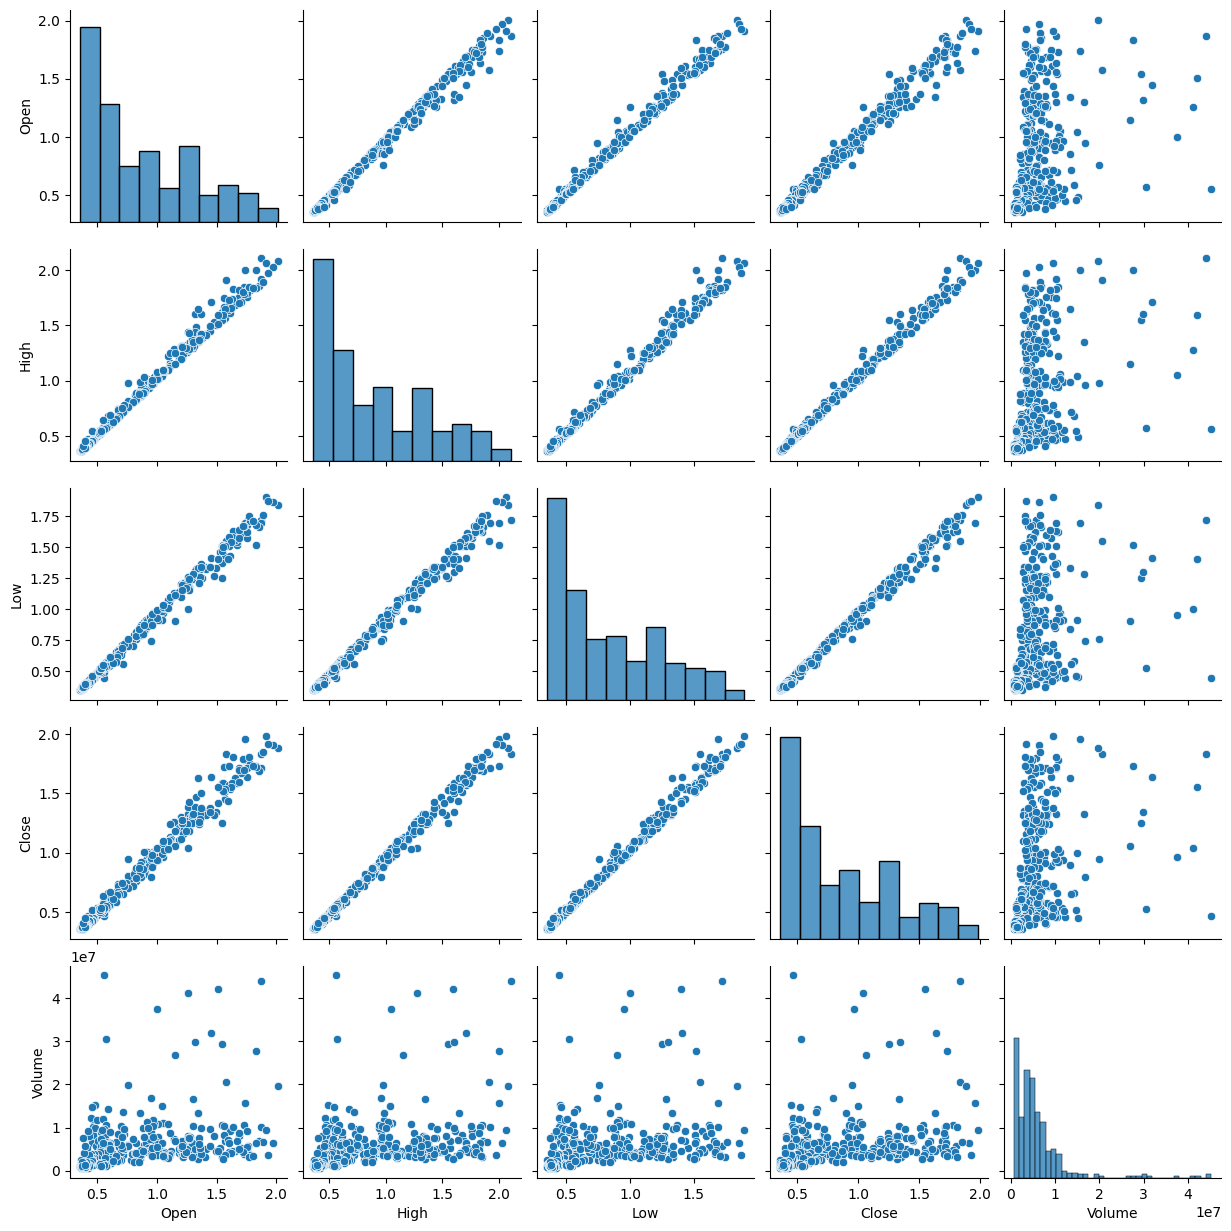

In [ ]:
plt.figure(figsize = (6,4))
sns.pairplot(df_ocug)

In [ ]:
# We can see really high correlations throughout and that it has consistently
# been in a linear pattern

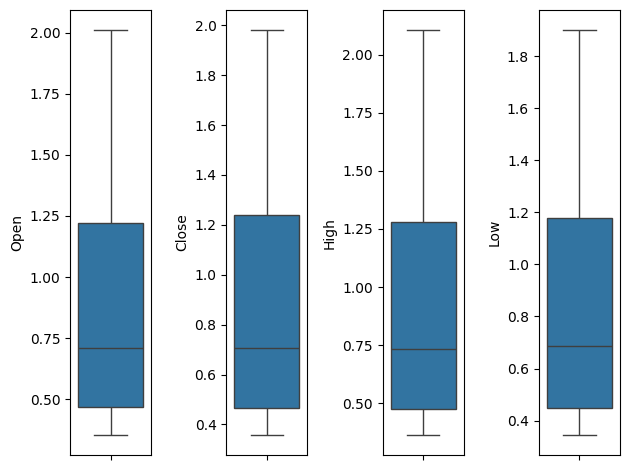

In [ ]:
# Box plots
f, axes = plt.subplots(1,4)
sns.boxplot( y = 'Open', data = df_ocug, ax = axes[0])
sns.boxplot( y = 'Close', data = df_ocug, ax = axes[1])
sns.boxplot( y = 'High', data = df_ocug, ax = axes[2])
sns.boxplot( y = 'Low', data = df_ocug, ax = axes[3])
plt.tight_layout()

In [ ]:
# No outliers in this dataset and all the values are present within the
# 0.5 to the 1.25 range within the dataset

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data = [go.Candlestick(x=df_ocug['Date'],
                            open = df_ocug['Open'], close = df_ocug['Close'],
                           high = df_ocug['High'], low = df_ocug['Low'])])
figure.update_layout(title = 'Ocugen Stock Price Analysis', xaxis_rangeslider_visible = False)
figure.show()

In [ ]:
# Using this, we can see that the stock appears to be more volatile now

### Ocugen train_test_split


In [ ]:
x_ocug = df_ocug[['Open', 'Low', 'Volume', 'High']]
y_ocug = df_ocug['Close']

In [ ]:
x_train_ocug = x_ocug.iloc[:311]
y_train_ocug = y_ocug.iloc[:311]
x_test_ocug = x_ocug.iloc[311:]
y_test_ocug = y_ocug.iloc[311:]

In [ ]:
print("Train:", x_train_ocug.shape)
print('Test:', x_test_ocug.shape)

Train: (311, 4)
Test: (78, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

In [ ]:
regressor_ocug = LinearRegression()

regressor_ocug = regressor_ocug.fit(x_train_ocug, y_train_ocug)

In [ ]:
y_pred_ocug = regressor_ocug.predict(x_test_ocug)

In [ ]:
y_pred_ocug.shape

(78,)

In [ ]:
print('Model Coefficients:', regressor_ocug.coef_)
print('Model Intercept: ', regressor_ocug.intercept_)

Model Coefficients: [-5.23863661e-01  6.71762668e-01 -5.28349364e-10  8.49045786e-01]
Model Intercept:  0.0016100745748660605


### Ocugen Actual Vs Predicted Prices

In [ ]:
pd.set_option('display.max_rows', None)
dframe_ocug = pd.DataFrame(y_test_ocug, y_pred_ocug)
dfr_ocug = pd.DataFrame({'Actual Price': y_test_ocug, 'Predicted Price': y_pred_ocug})
print(dfr_ocug)

     Actual Price  Predicted Price
311         0.988         1.037130
312         0.942         0.966562
313         0.984         0.999333
314         1.040         1.056825
315         1.020         1.047718
316         1.080         1.060312
317         1.030         1.139247
318         1.100         1.075635
319         1.240         1.215760
320         1.340         1.526148
321         1.640         1.624238
322         1.830         1.941371
323         1.730         1.747497
324         1.780         1.748718
325         1.640         1.628992
326         1.540         1.480868
327         1.380         1.373450
328         1.505         1.551368
329         1.510         1.612300
330         1.830         1.825927
331         1.880         1.940314
332         1.710         1.782704
333         1.800         1.777266
334         1.690         1.723223
335         1.710         1.681175
336         1.590         1.579082
337         1.590         1.567597
338         1.440   

In [ ]:
dfr_ocug.describe()

Actual Price  Predicted Price
count     78.000000        78.000000
mean       1.506654         1.519640
std        0.264007         0.259017
min        0.942000         0.966562
25%        1.320000         1.323112
50%        1.545000         1.573339
75%        1.717500         1.726359
max        1.980000         2.021407

In [ ]:
regression_confidence_ocug = regressor_ocug.score(x_test_ocug, y_test_ocug)
print('Linear Regression Confidence', regression_confidence_ocug)

Linear Regression Confidence 0.9693307528809503


In [ ]:
import plotly.graph_objects as go

x_graph_comp_ocug = dfr_cosm.index
y1_graph_comp_ocug = dfr_ocug['Actual Price']
y2_graph_comp_ocug = dfr_ocug['Predicted Price']

trace1 = go.Scatter(x=x_graph_comp_ocug, y=y1_graph_comp_ocug, mode='lines',
                    name='Line 1', line=dict(color='red'))
trace2 = go.Scatter(x=x_graph_comp_ocug, y=y2_graph_comp_ocug, mode='lines',
                    name='Line 2', line=dict(color='blue'))

fig = go.Figure(data = [trace1, trace2])

fig.update_layout(
    title='Predicted Prices Compared to Actual Prices',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    title_x = 0.5,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    legend_title_text='Lines'
)

fig.show()

## Sirius XM

In [ ]:
df_siri = pd.read_csv(sirius_xm)
df_siri.head()

Date  Open  High   Low  Close  Adj Close    Volume
0  2022-12-09  6.17  6.17  6.09   6.11   5.894689   8435200
1  2022-12-12  6.09  6.17  6.05   6.15   5.933280   9467400
2  2022-12-13  6.25  6.26  6.14   6.16   5.942926  15129600
3  2022-12-14  6.12  6.21  6.07   6.12   5.904336  13779800
4  2022-12-15  6.09  6.11  5.97   5.97   5.759623  16720700

In [ ]:
df_siri = df_siri.drop(columns = 'Adj Close')
df_siri.head()

Date  Open  High   Low  Close    Volume
0  2022-12-09  6.17  6.17  6.09   6.11   8435200
1  2022-12-12  6.09  6.17  6.05   6.15   9467400
2  2022-12-13  6.25  6.26  6.14   6.16  15129600
3  2022-12-14  6.12  6.21  6.07   6.12  13779800
4  2022-12-15  6.09  6.11  5.97   5.97  16720700

In [ ]:
df_siri.duplicated().values.any()

False

In [ ]:
df_siri.isnull().values.any()

False

In [ ]:
df_siri.describe()

Open        High         Low       Close        Volume
count  389.000000  389.000000  389.000000  389.000000  3.890000e+02
mean     4.364319    4.444730    4.273882    4.354267  1.888014e+07
std      0.913387    0.939594    0.893458    0.920406  2.110441e+07
min      2.510000    2.580000    2.450000    2.530000  3.740400e+06
25%      3.710000    3.790000    3.650000    3.710000  1.136580e+07
50%      4.360000    4.440000    4.240000    4.320000  1.473700e+07
75%      5.000000    5.090000    4.850000    4.960000  1.955690e+07
max      6.990000    7.950000    6.570000    7.810000  3.306641e+08

In [ ]:
print(df_siri[specific_columns].corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.987632  0.994738  0.982550 -0.181027
High    0.987632  1.000000  0.984058  0.994256 -0.126469
Low     0.994738  0.984058  1.000000  0.988078 -0.200585
Close   0.982550  0.994256  0.988078  1.000000 -0.147728
Volume -0.181027 -0.126469 -0.200585 -0.147728  1.000000


<Axes: >

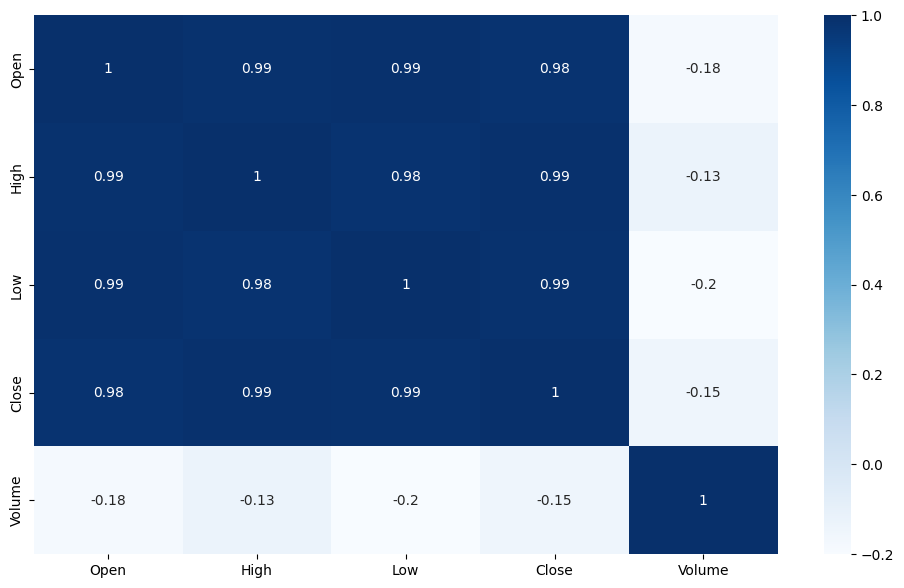

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df_siri[specific_columns].corr(), cmap = 'Blues', annot = True)

<Figure size 1000x700 with 0 Axes>

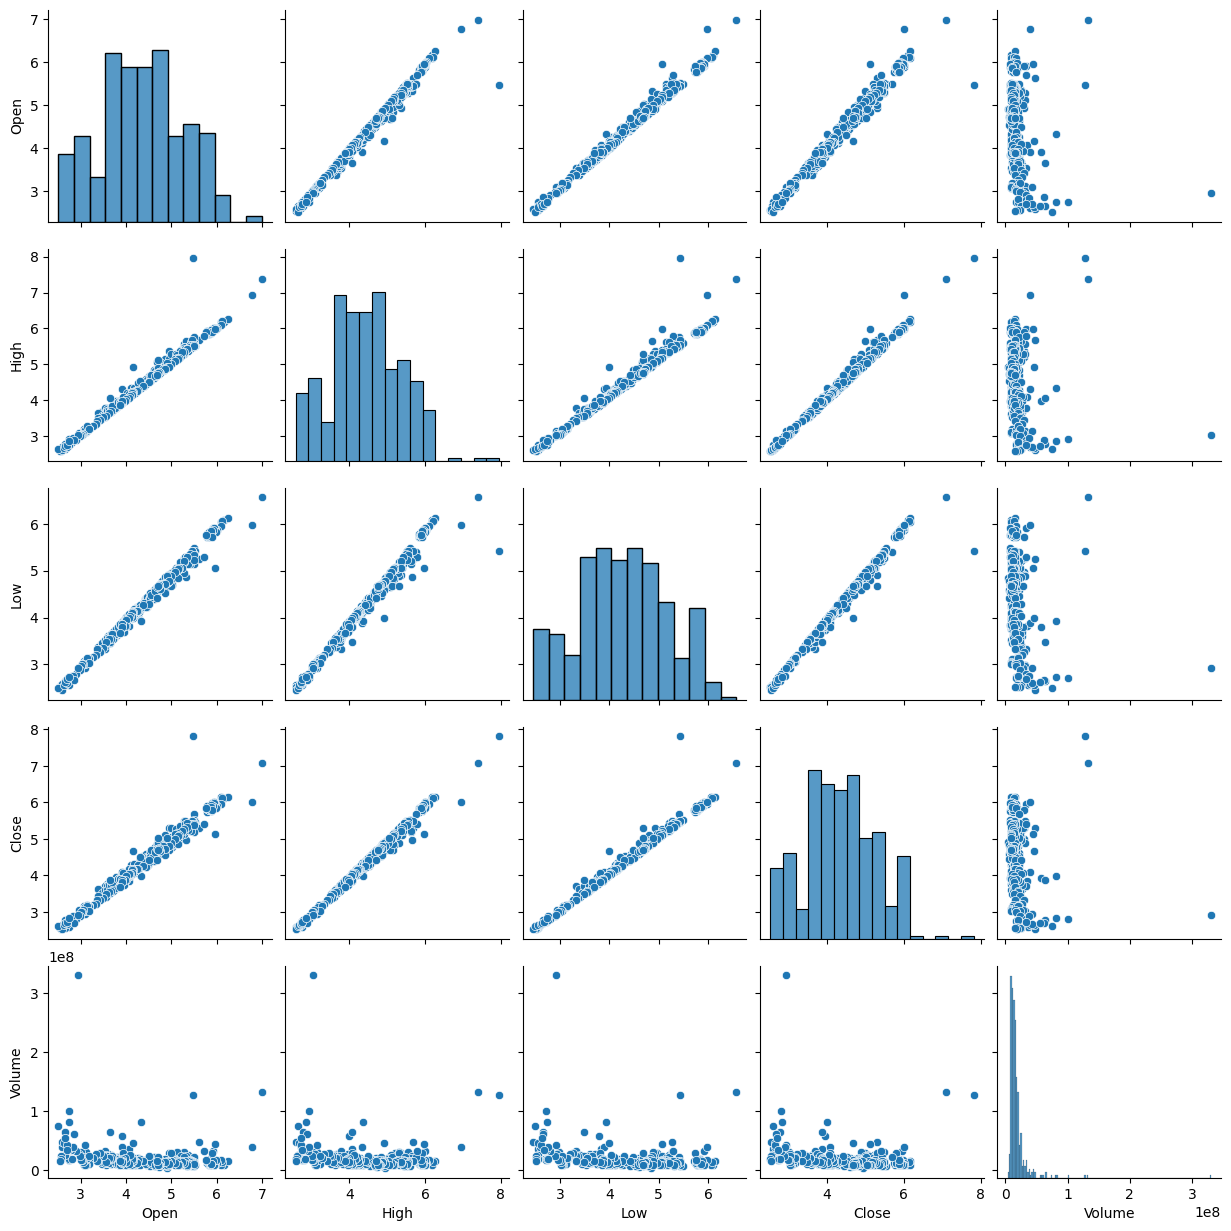

In [ ]:
plt.figure(figsize = (10,7))
sns.pairplot(df_siri)

In [ ]:
# Some prescence of outliers however, a generall strong correlation throughout

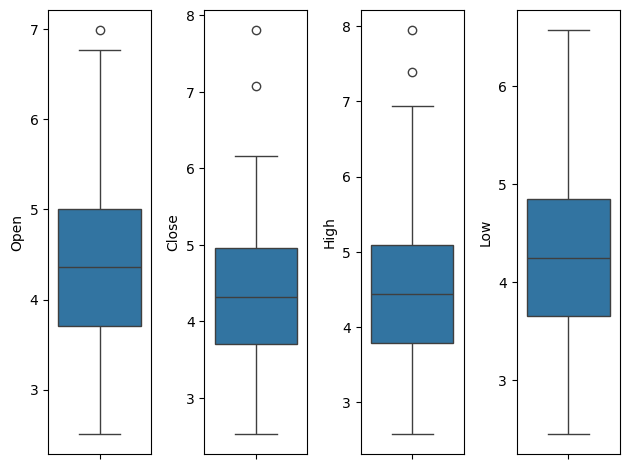

In [ ]:
# Box plots
f, axes = plt.subplots(1,4)
sns.boxplot( y = 'Open', data = df_siri, ax = axes[0])
sns.boxplot( y = 'Close', data = df_siri, ax = axes[1])
sns.boxplot( y = 'High', data = df_siri, ax = axes[2])
sns.boxplot( y = 'Low', data = df_siri, ax = axes[3])
plt.tight_layout()

In [ ]:
# We can see some outliers however, all the values are within an approximate
# 3.8 - 5 ish range

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data = [go.Candlestick(x=df_siri['Date'],
                            open = df_siri['Open'], close = df_siri['Close'],
                           high = df_siri['High'], low = df_siri['Low'])])
figure.update_layout(title = 'Sirius XM Stock Price Analysis',
                     xaxis_rangeslider_visible = False,
                     title_x = 0.5)
figure.show()

### Sirius XM train_test_split

In [ ]:
x_siri = df_siri[['Open', 'High', 'Low', 'Volume']]
y_siri = df_siri['Close']

In [ ]:
x_train_siri = x_siri.iloc[:311]
y_train_siri = y_siri.iloc[:311]
x_test_siri = x_siri.iloc[311:]
y_test_siri = y_siri.iloc[311:]

In [ ]:
print('Train:', x_train_siri.shape)
print('Test:', x_test_siri.shape)

Train: (311, 4)
Test: (78, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

In [ ]:
regressor_siri = LinearRegression()

regressor_siri = regressor_siri.fit(x_train_siri, y_train_siri)

In [ ]:
y_pred_siri = regressor_siri.predict(x_test_siri)

In [ ]:
print('Model Coefficients:', regressor_siri.coef_)
print('Model Intercept: ', regressor_siri.intercept_)

Model Coefficients: [-8.12966715e-01  8.41226111e-01  9.72818614e-01  1.13931609e-09]
Model Intercept:  -0.01182089536965858


### Sirius XM Actual VS Predicted Prices


In [ ]:
pd.set_option('display.max_rows', None)
dframe_siri = pd.DataFrame(y_test_siri, y_pred_siri)
dfr_siri = pd.DataFrame({'Actual Price': y_test_siri, 'Predicted Price': y_pred_siri})
print(dfr_siri)

     Actual Price  Predicted Price
311          4.16         4.207555
312          4.17         4.207625
313          4.11         4.057000
314          4.14         4.169027
315          4.08         4.047020
316          4.05         4.079156
317          4.03         4.007518
318          3.99         3.995206
319          3.87         3.857648
320          3.88         3.903083
321          3.88         3.850705
322          3.89         3.912528
323          3.86         3.903627
324          3.90         3.915317
325          3.88         3.892935
326          3.83         3.879387
327          3.69         3.695694
328          3.57         3.585491
329          3.55         3.583901
330          3.49         3.498354
331          3.38         3.417056
332          3.45         3.451517
333          3.34         3.333192
334          3.34         3.364504
335          3.21         3.226213
336          3.18         3.167950
337          3.15         3.127495
338          3.10   

In [ ]:
dfr_ocug.describe()

Actual Price  Predicted Price
count     78.000000        78.000000
mean       1.506654         1.519640
std        0.264007         0.259017
min        0.942000         0.966562
25%        1.320000         1.323112
50%        1.545000         1.573339
75%        1.717500         1.726359
max        1.980000         2.021407

In [ ]:
regression_confidence_siri = regressor_siri.score(x_test_siri, y_test_siri)
print('Linear Regression Confidence', regression_confidence_siri)

Linear Regression Confidence 0.9844059178721671


In [ ]:
# This model is highly accurate in contrast to the previous two models

In [ ]:
import plotly.graph_objects as go

x_graph_comp_ocug = dfr_cosm.index
y1_graph_comp_ocug = dfr_ocug['Actual Price']
y2_graph_comp_ocug = dfr_ocug['Predicted Price']

trace1 = go.Scatter(x=x_graph_comp_ocug, y=y1_graph_comp_ocug, mode='lines',
                    name='Line 1', line=dict(color='red'))
trace2 = go.Scatter(x=x_graph_comp_ocug, y=y2_graph_comp_ocug, mode='lines',
                    name='Line 2', line=dict(color='blue'))

fig = go.Figure(data = [trace1, trace2])

fig.update_layout(
    title='Predicted Prices Compared to Actual Prices',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    title_x = 0.5,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    legend_title_text='Lines'
)

fig.show()

## ECD Automotives

In [ ]:
df_ecda = pd.read_csv(ecd_auto)
df_ecda.head()

Date    Open   High    Low  Close  Adj Close  Volume
0  2022-12-09   9.980  10.03   9.98  10.01      10.01    9300
1  2022-12-12  10.010  10.01   9.99  10.00      10.00  250300
2  2022-12-13  10.000  10.00  10.00  10.00      10.00       0
3  2022-12-14  10.189  10.61  10.00  10.01      10.01   18600
4  2022-12-15  10.040  10.30  10.00  10.01      10.01   24500

In [ ]:
df_ecda = df_ecda.drop(columns = 'Adj Close')
df_ecda.head()

Date    Open   High    Low  Close  Volume
0  2022-12-09   9.980  10.03   9.98  10.01    9300
1  2022-12-12  10.010  10.01   9.99  10.00  250300
2  2022-12-13  10.000  10.00  10.00  10.00       0
3  2022-12-14  10.189  10.61  10.00  10.01   18600
4  2022-12-15  10.040  10.30  10.00  10.01   24500

In [ ]:
df_ecda.duplicated().values.any()

False

In [ ]:
df_ecda.isnull().values.any()

False

In [ ]:
df_ecda.describe()

Open        High         Low       Close        Volume
count  389.000000  389.000000  389.000000  389.000000  3.890000e+02
mean     7.099959    7.176774    7.033062    7.073458  1.136522e+05
std      4.410428    4.429823    4.435862    4.416538  9.266785e+05
min      0.776000    0.851000    0.770000    0.800000  0.000000e+00
25%      1.150000    1.190000    1.110000    1.150000  1.000000e+02
50%     10.200000   10.250000   10.190000   10.200000  8.200000e+03
75%     10.390000   10.430000   10.370000   10.370000  4.280000e+04
max     10.910000   17.000000   10.910000   10.910000  1.796340e+07

In [ ]:
print(df_ecda[specific_columns].corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.992458  0.997408  0.997705 -0.107750
High    0.992458  1.000000  0.988828  0.993008 -0.098198
Low     0.997408  0.988828  1.000000  0.999274 -0.110974
Close   0.997705  0.993008  0.999274  1.000000 -0.108192
Volume -0.107750 -0.098198 -0.110974 -0.108192  1.000000


<Axes: >

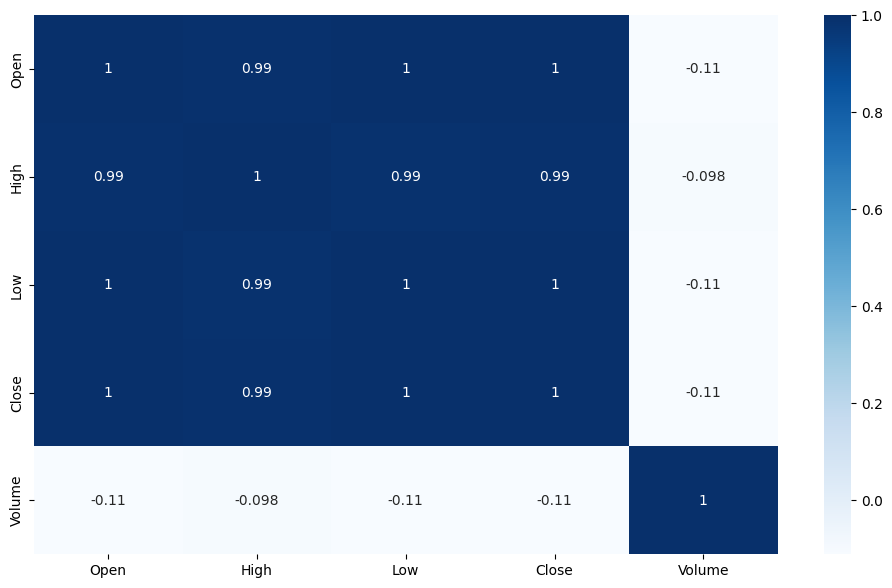

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df_ecda[specific_columns].corr(), cmap = 'Blues', annot = True)

<Figure size 600x400 with 0 Axes>

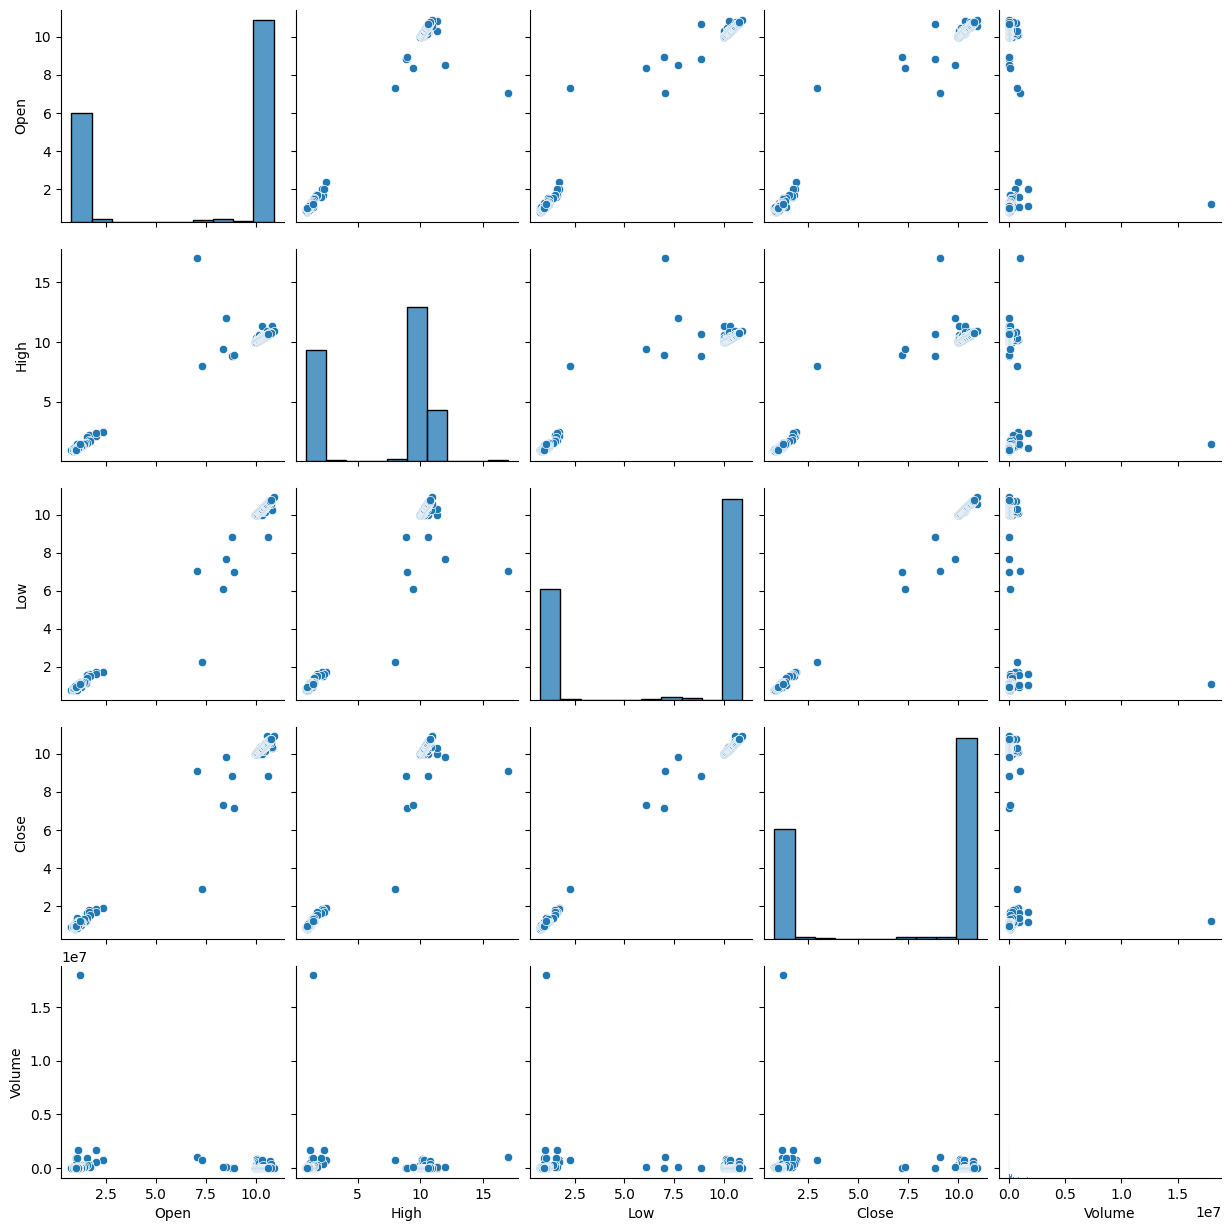

In [ ]:
plt.figure(figsize = (6,4))
sns.pairplot(df_ecda)

In [ ]:
# We can't visualize this relation very clearly as of right now
# However, the correlation is very tight

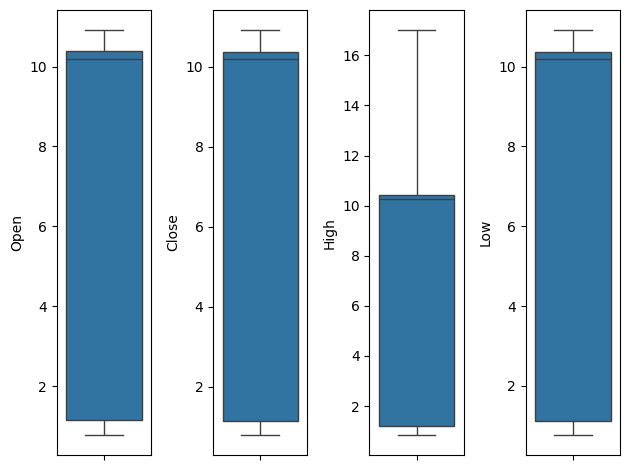

In [ ]:
# Box plot creation
f, axes = plt.subplots(1,4)
sns.boxplot( y = 'Open', data = df_ecda, ax = axes[0])
sns.boxplot( y = 'Close', data = df_ecda, ax = axes[1])
sns.boxplot( y = 'High', data = df_ecda, ax = axes[2])
sns.boxplot( y = 'Low', data = df_ecda, ax = axes[3])
plt.tight_layout()

In [ ]:
# No real outliers present

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data = [go.Candlestick(x=df_ecda['Date'],
                                          open = df_ecda['Open'],
                                          close = df_ecda['Close'],
                                          high = df_ecda['High'],
                                          low = df_ecda['Low'])])
figure.update_layout(title = 'ECD Automotives Price Analysis',
                     xaxis_rangeslider_visible = False,
                     title_x = 0.5)
figure.show()

In [ ]:
# Large drop in price turning it into a penny stock

### ECD Automotives train_test_split

In [ ]:
x_ecda = df_ecda[['Open', 'Low', 'High', 'Volume']]
y_ecda = df_ecda['Close']

In [ ]:
x_train_ecda = x_ecda.iloc[:311]
y_train_ecda = y_ecda.iloc[:311]
x_test_ecda = x_ecda.iloc[311:]
y_test_ecda = y_ecda.iloc[311:]

In [ ]:
print('Train:', x_train_ecda.shape)
print('Test:', x_test_ecda.shape)

Train: (311, 4)
Test: (78, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

In [ ]:
regressor_ecda = LinearRegression()

regressor_ecda = regressor_ecda.fit(x_train_ecda, y_train_ecda)

In [ ]:
y_pred_ecda = regressor_ecda.predict(x_test_ecda)

In [ ]:
y_pred_ecda.shape

(78,)

In [ ]:
print('Model Coefficients:', regressor_ecda.coef_)
print('Model Intercept:', regressor_ecda.intercept_)

Model Coefficients: [-9.92073789e-02  8.46514343e-01  2.48779710e-01 -3.32211431e-08]
Model Intercept: 0.04374997537248504


### ECD Automotives Predicted VS Actual Values

In [ ]:
pd.set_option('display.max_rows', None)
dframe_ecda = pd.DataFrame(y_test_ecda, y_pred_ecda)
dfr_ecda = pd.DataFrame({'Actual Price': y_test_ecda, 'Predicted Price': y_pred_ecda})
print(dfr_ecda)

     Actual Price  Predicted Price
311         0.940         0.916950
312         1.060         0.999020
313         1.200         1.059153
314         1.070         1.076331
315         0.850         0.874926
316         0.900         0.924418
317         1.040         0.988320
318         1.000         1.026229
319         0.990         1.013276
320         1.000         1.001178
321         1.020         1.034023
322         0.990         0.964329
323         0.990         0.990887
324         0.960         0.998857
325         0.940         0.983945
326         0.890         0.924206
327         0.910         0.925873
328         0.888         0.937370
329         0.950         0.941846
330         0.957         0.999917
331         1.030         0.988326
332         1.050         1.095357
333         1.105         1.148347
334         1.390         1.154636
335         1.400         1.450020
336         1.210         1.285457
337         1.140         1.188184
338         1.150   

In [ ]:
dfr_ecda.describe()

Actual Price  Predicted Price
count     78.000000        78.000000
mean       1.085885         1.091728
std        0.112165         0.119557
min        0.850000         0.609384
25%        0.990000         1.005679
50%        1.107500         1.125539
75%        1.160000         1.176326
max        1.400000         1.450020

In [ ]:
regression_confidence_ecda = regressor_ecda.score(x_test_ecda, y_test_ecda)
print('Linear Regression Confidence:', regression_confidence_ecda)

Linear Regression Confidence: 0.4585428312375659


In [ ]:
import plotly.graph_objects as go

x_graph_comp_ecda = dfr_ecda.index
y1_graph_comp_ecda = dfr_ecda['Actual Price']
y2_graph_comp_ecda = dfr_ecda['Predicted Price']

trace1 = go.Scatter(x=x_graph_comp_ecda, y=y1_graph_comp_ecda, mode='lines',
                    name = 'Line 1', line = dict(color = 'red'))
trace2 = go.Scatter(x=x_graph_comp_ecda, y=y2_graph_comp_ecda, mode='lines',
                    name = 'Line 2', line = dict(color = 'blue'))

fig = go.Figure(data =[trace1, trace2])

fig.update_layout(
    title='Predicted Prices Compared to Actual Prices',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    title_x = 0.5,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    legend_title_text='Lines'
)

fig.show()

## Talkspace Inc

In [ ]:
df_tksp = pd.read_csv(talkspace)
df_tksp.head()

Date   Open   High    Low  Close  Adj Close  Volume
0  2022-12-09  0.711  0.762  0.700  0.720      0.720  238500
1  2022-12-12  0.720  0.772  0.700  0.715      0.715  348000
2  2022-12-13  0.762  0.793  0.715  0.758      0.758  360400
3  2022-12-14  0.730  0.777  0.702  0.707      0.707  344000
4  2022-12-15  0.690  0.802  0.690  0.770      0.770  577500

In [ ]:
df_tksp = df_tksp.drop(columns = 'Adj Close')
df_tksp.head()

Date   Open   High    Low  Close  Volume
0  2022-12-09  0.711  0.762  0.700  0.720  238500
1  2022-12-12  0.720  0.772  0.700  0.715  348000
2  2022-12-13  0.762  0.793  0.715  0.758  360400
3  2022-12-14  0.730  0.777  0.702  0.707  344000
4  2022-12-15  0.690  0.802  0.690  0.770  577500

In [ ]:
df_tksp.duplicated().values.any()

False

In [ ]:
df_tksp.isnull().values.any()

False

In [ ]:
df_tksp.describe()

Open        High         Low       Close        Volume
count  389.000000  389.000000  389.000000  389.000000  3.890000e+02
mean     1.788072    1.840650    1.734296    1.787288  8.750391e+05
std      0.865194    0.881503    0.847381    0.860854  1.308522e+06
min      0.580000    0.626000    0.530000    0.584000  4.990000e+04
25%      0.910000    0.946000    0.863000    0.915000  3.212000e+05
50%      1.700000    1.750000    1.660000    1.710000  5.945000e+05
75%      2.430000    2.470000    2.370000    2.410000  1.063800e+06
max      3.800000    3.920000    3.715000    3.780000  1.977520e+07

In [ ]:
print(df_tksp[specific_columns].corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.998633  0.998023  0.996976  0.306129
High    0.998633  1.000000  0.998083  0.998458  0.321638
Low     0.998023  0.998083  1.000000  0.998884  0.298456
Close   0.996976  0.998458  0.998884  1.000000  0.311160
Volume  0.306129  0.321638  0.298456  0.311160  1.000000


<Axes: >

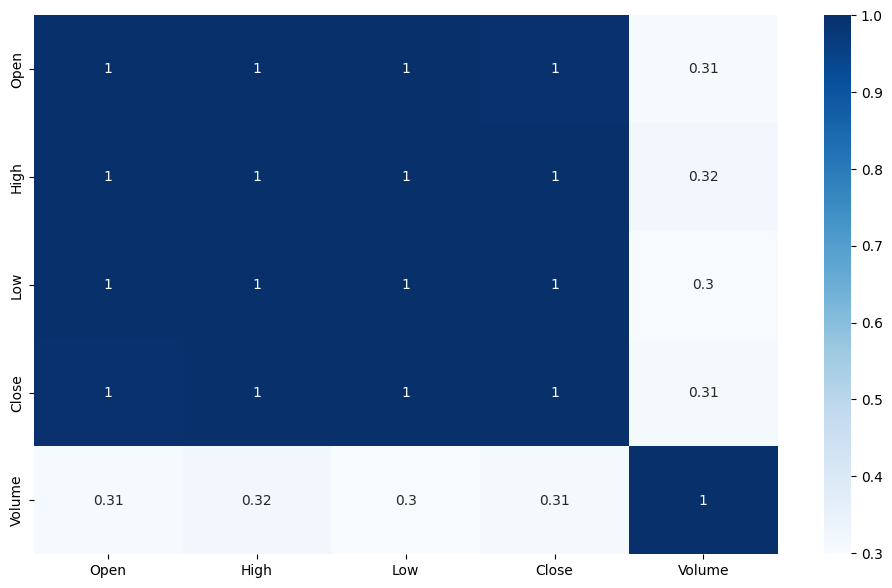

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df_tksp[specific_columns].corr(), cmap = 'Blues', annot = True)

<Figure size 1000x700 with 0 Axes>

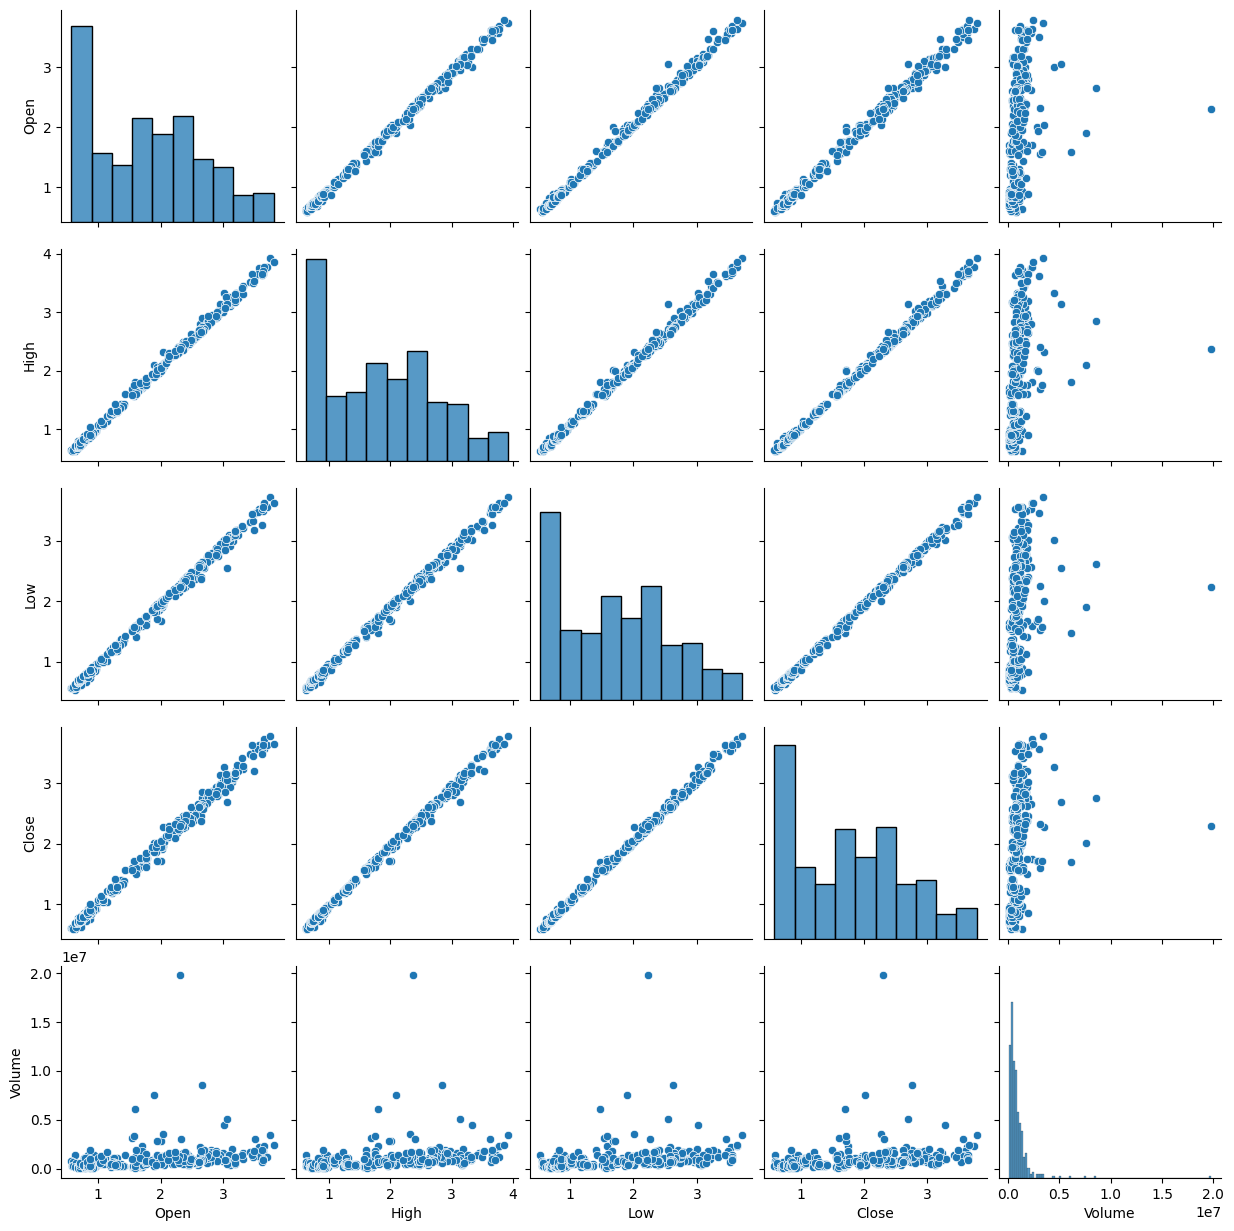

In [ ]:
plt.figure(figsize = (10,7))
sns.pairplot(df_tksp)

In [ ]:
# not many outliers and strong correlation generally

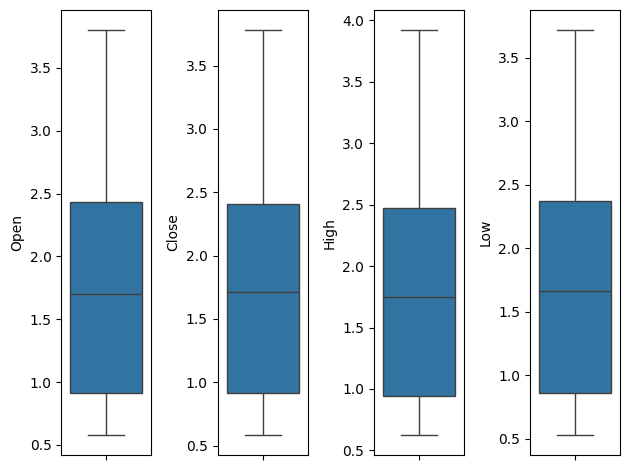

In [ ]:
f, axes = plt.subplots(1,4)
sns.boxplot(y='Open', data = df_tksp, ax = axes[0])
sns.boxplot(y='Close', data = df_tksp, ax = axes[1])
sns.boxplot(y='High', data = df_tksp, ax = axes[2])
sns.boxplot(y='Low', data = df_tksp, ax = axes[3])
plt.tight_layout()

In [ ]:
# Low outliers and all of the valus are present within the 0.9-2.4 range

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data = [go.Candlestick(x=df_tksp['Date'],
                                          open = df_tksp['Open'],
                                          close = df_tksp['Close'],
                                          high = df_tksp['High'],
                                          low = df_tksp['Low'])])
figure.update_layout(title = 'TalkSpace Stock Price Analysis',
                     xaxis_rangeslider_visible = False,
                     title_x = 0.5)
figure.show()


### TalkSpace train_test_split

In [ ]:
x_tksp = df_tksp[['Open', 'High', 'Low', 'Volume']]
y_tksp = df_tksp['Close']

In [ ]:
x_train_tksp = x_tksp.iloc[:311]
y_train_tksp = y_tksp.iloc[:311]
x_test_tksp = x_tksp.iloc[311:]
y_test_tksp = y_tksp.iloc[311:]

In [ ]:
print('Train', x_train_tksp.shape)
print('Test:', x_test_tksp.shape)

Train (311, 4)
Test: (78, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm

In [ ]:
regressor_tksp = LinearRegression()

regressor_tksp = regressor_tksp.fit(x_train_tksp, y_train_tksp)

In [ ]:
y_pred_tksp = regressor_tksp.predict(x_test_tksp)

In [ ]:
print('Model Coefficients:', regressor_tksp.coef_)
print('Model Intercept:', regressor_tksp.intercept_)

Model Coefficients: [-4.00070859e-01  7.12583439e-01  6.86347626e-01 -6.58999855e-10]
Model Intercept: 0.0035219900791636505


### Talkspace Actual VS Predicted Prices

In [ ]:
pd.set_option('display.max_rows', None)
dframe_tksp = pd.DataFrame(y_test_tksp, y_pred_tksp)
dfr_tksp = pd.DataFrame({'Actual Price': y_test_tksp, 'Predicted Price':y_pred_tksp})
print(dfr_tksp)

     Actual Price  Predicted Price
311          3.00         2.996576
312          2.92         2.917793
313          3.28         3.235158
314          3.24         3.343143
315          3.23         3.274663
316          3.21         3.147614
317          3.30         3.253017
318          3.29         3.242749
319          3.42         3.350005
320          3.48         3.406557
321          3.57         3.548722
322          3.63         3.679511
323          3.60         3.546383
324          3.57         3.636821
325          3.57         3.578971
326          3.54         3.564554
327          3.46         3.394057
328          3.64         3.587353
329          3.63         3.652308
330          3.65         3.598753
331          3.73         3.726741
332          3.78         3.848097
333          3.66         3.723681
334          3.64         3.630881
335          3.48         3.403563
336          3.20         3.308076
337          3.03         3.081626
338          2.94   

In [ ]:
dfr_tksp.describe()

Actual Price  Predicted Price
count     78.000000        78.000000
mean       2.967179         2.978394
std        0.446493         0.443355
min        2.090000         2.102125
25%        2.660000         2.688464
50%        2.955000         3.000460
75%        3.270000         3.269497
max        3.780000         3.848097

In [ ]:
regression_confidence_tksp = regressor_tksp.score(x_test_tksp, y_test_tksp)
print('Linear Regression Confidence', regression_confidence_tksp)

Linear Regression Confidence 0.9882638726900775


In [ ]:
# Highly accurate again

In [ ]:
import plotly.graph_objects as go

x_graph_comp_tksp = dfr_tksp.index
y1_graph_comp_tksp = dfr_tksp['Actual Price']
y2_graph_comp_tksp = dfr_tksp['Predicted Price']

trace1 = go.Scatter(x=x_graph_comp_tksp, y=y1_graph_comp_tksp, mode='lines',
                    name='Line 1', line=dict(color='red'))
trace2 = go.Scatter(x=x_graph_comp_tksp, y=y2_graph_comp_tksp, mode='lines',
                    name='Line 2', line=dict(color='blue'))

fig = go.Figure(data = [trace1, trace2])

fig.update_layout(
    title='Predicted Prices Compared to Actual Prices',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    title_x = 0.5,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    legend_title_text='Lines'
)

fig.show()

# ALL REGULAR STOCKS

## FedEx Inc

In [ ]:
df_fdx = pd.read_csv(fedex)
df_fdx.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-12-09  170.149994  174.830002  170.149994  172.330002  167.016708   
1  2022-12-12  172.080002  178.229996  172.080002  177.369995  171.901321   
2  2022-12-13  183.690002  184.389999  175.589996  176.880005  171.426422   
3  2022-12-14  176.369995  180.929993  175.809998  178.070007  172.579712   
4  2022-12-15  175.119995  176.300003  171.770004  173.169998  167.830811   

    Volume  
0  1475000  
1  2461600  
2  2754300  
3  1611700  
4  1802600

In [ ]:
df_fdx = df_fdx.drop(columns = 'Adj Close')
df_fdx.head()

Date        Open        High         Low       Close   Volume
0  2022-12-09  170.149994  174.830002  170.149994  172.330002  1475000
1  2022-12-12  172.080002  178.229996  172.080002  177.369995  2461600
2  2022-12-13  183.690002  184.389999  175.589996  176.880005  2754300
3  2022-12-14  176.369995  180.929993  175.809998  178.070007  1611700
4  2022-12-15  175.119995  176.300003  171.770004  173.169998  1802600

In [ ]:
df_fdx.duplicated().values.any()

False

In [ ]:
df_fdx.isnull().values.any()

False

In [ ]:
df_fdx.describe()

Open        High         Low       Close        Volume
count  389.000000  389.000000  389.000000  389.000000  3.890000e+02
mean   240.062262  242.537352  237.971363  240.366170  2.049594e+06
std     26.690625   26.644246   26.549736   26.600273  1.547682e+06
min    167.919998  168.509995  162.610001  164.350006  4.522000e+05
25%    225.570007  228.830002  223.619995  226.139999  1.324200e+06
50%    247.100006  249.449997  245.220001  247.639999  1.654200e+06
75%    258.760010  260.989990  257.040009  258.829987  2.217600e+06
max    293.899994  302.410004  293.440002  299.839996  1.881650e+07

In [ ]:
print(df_fdx[specific_columns].corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.997032  0.997728  0.994411 -0.020252
High    0.997032  1.000000  0.997638  0.998045  0.002315
Low     0.997728  0.997638  1.000000  0.997655 -0.030081
Close   0.994411  0.998045  0.997655  1.000000 -0.014923
Volume -0.020252  0.002315 -0.030081 -0.014923  1.000000


<Axes: >

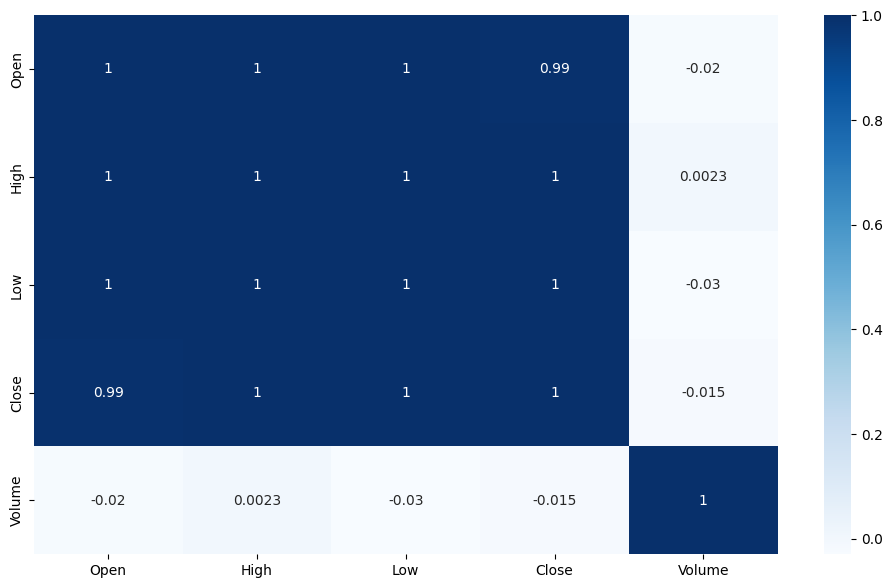

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df_fdx[specific_columns].corr(), cmap = 'Blues', annot = True)

In [ ]:
# Extremely High correlations throughout

<Figure size 1000x700 with 0 Axes>

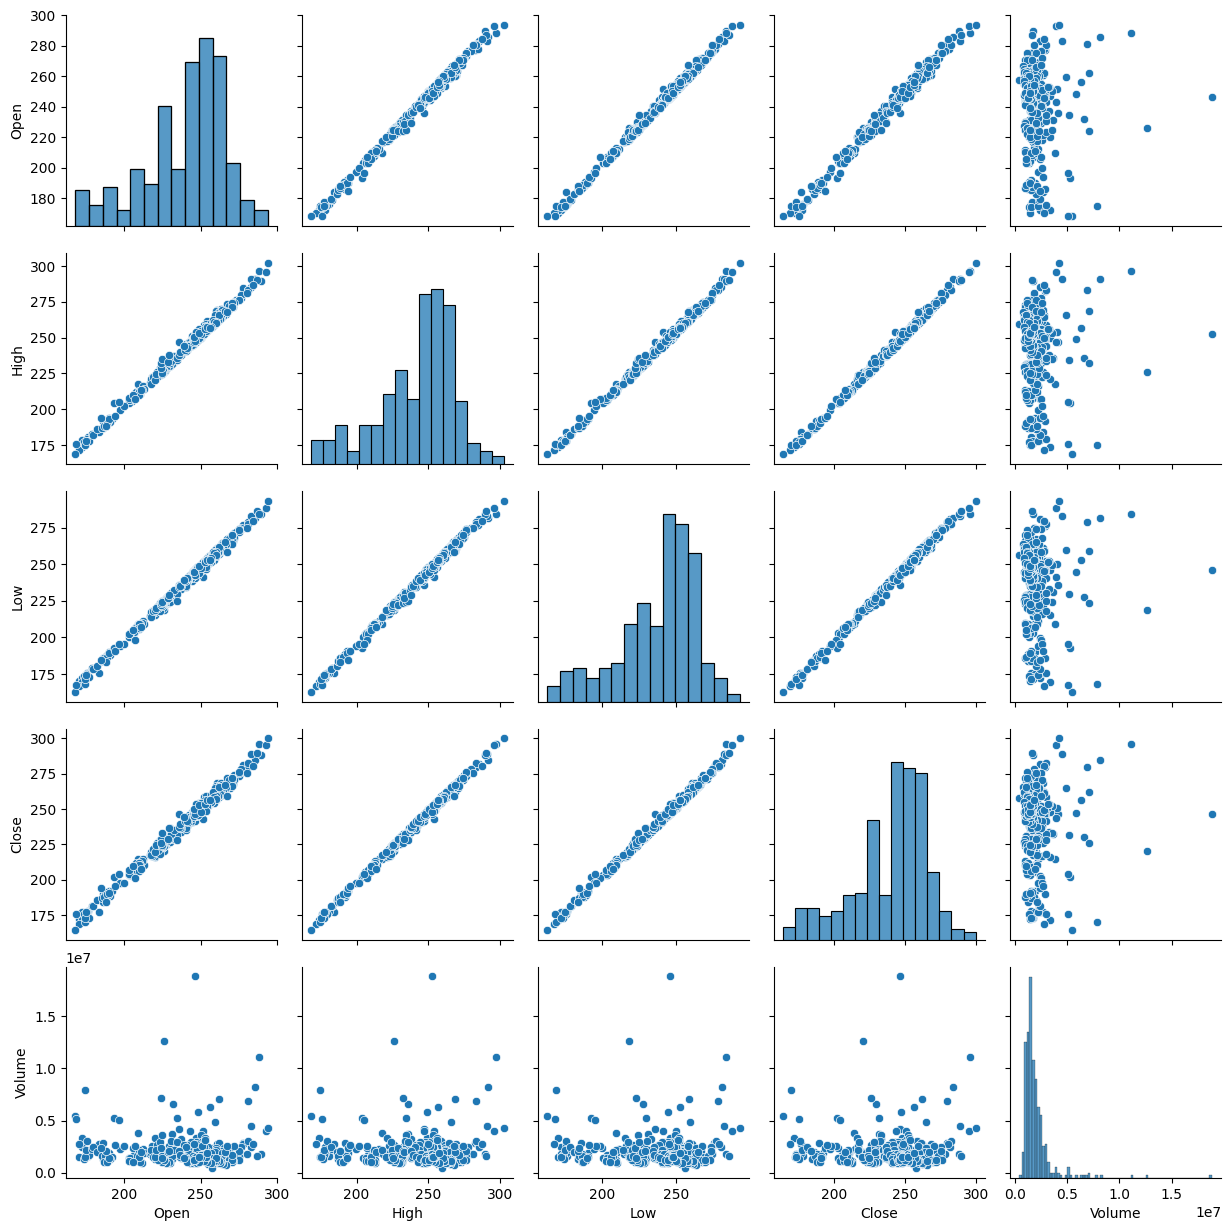

In [ ]:
plt.figure(figsize = (10,7))
sns.pairplot(df_fdx)

In [ ]:
# Visualizing very strong correlations throughout

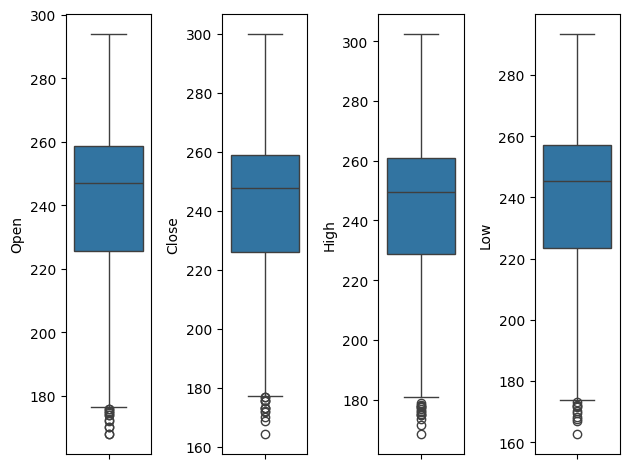

In [ ]:
f, axes = plt.subplots(1,4)
sns.boxplot(y = 'Open', data = df_fdx, ax = axes[0])
sns.boxplot(y = 'Close', data = df_fdx, ax = axes[1])
sns.boxplot(y = 'High', data = df_fdx, ax = axes[2])
sns.boxplot(y = 'Low', data = df_fdx, ax = axes[3])
plt.tight_layout()

In [ ]:
# Tight correlation however, there is presence of outliers

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data = [go.Candlestick(x=df_fdx['Date'],
                                          open = df_fdx['Open'],
                                          close = df_fdx['Close'],
                                          high = df_fdx['High'],
                                          low = df_fdx['Low'])])
figure.update_layout(title = 'FedEx Stock Price Analysis',
                     xaxis_rangeslider_visible = False,
                     title_x = 0.5)
figure.show()

### FedEx train_test_split

In [ ]:
x_fdx = df_fdx[['Open', 'High', 'Low', 'Volume']]
y_fdx = df_fdx['Close']

In [ ]:
x_train_fdx = x_fdx.iloc[:311]
y_train_fdx = y_fdx.iloc[:311]
x_test_fdx = x_fdx.iloc[311:]
y_test_fdx = y_fdx.iloc[311:]

In [ ]:
print('Train:', x_train_fdx.shape)
print('Test:', x_test_fdx.shape)

Train: (311, 4)
Test: (78, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

In [ ]:
regressor_fdx = LinearRegression()

regressor_fdx = regressor_fdx.fit(x_train_fdx, y_train_fdx)

In [ ]:
y_pred_fdx = regressor_fdx.predict(x_test_fdx)

In [ ]:
print('Model Coefficients:', regressor_fdx.coef_)
print('Model Intercept:', regressor_fdx.intercept_)

Model Coefficients: [-4.82175901e-01  7.77021164e-01  7.02307761e-01 -1.69410553e-07]
Model Intercept: 0.820283369449669


### FedEx Actual VS Predicted Prices

In [ ]:
pd.set_option('display.max_rows', None)
dframe_fdx = pd.DataFrame(y_test_fdx, y_pred_fdx)
dfr_fdx = pd.DataFrame({'Actual Price': y_test_fdx, 'Predicted Price': y_pred_fdx})
print(dfr_fdx)

     Actual Price  Predicted Price
311    247.679993       248.348094
312    252.699997       252.025041
313    254.220001       256.837204
314    255.220001       257.159589
315    255.529999       255.065840
316    253.289993       254.317207
317    253.179993       253.262027
318    256.619995       255.862812
319    259.989990       258.024946
320    264.850006       263.444304
321    284.320007       285.483713
322    282.570007       279.759923
323    288.989990       288.201700
324    287.880005       285.632825
325    289.739990       288.882248
326    280.130005       282.573690
327    275.290009       275.344957
328    278.489990       277.526781
329    275.510010       276.496405
330    273.519989       273.515205
331    275.570007       275.361295
332    276.369995       275.036722
333    270.299988       269.969255
334    272.179993       271.855729
335    267.799988       267.774176
336    266.739990       268.034091
337    264.940002       264.208504
338    263.070007   

In [ ]:
dfr_fdx.describe()

Actual Price  Predicted Price
count     78.000000        78.000000
mean     262.385513       262.088494
std       13.054266        12.728284
min      245.110001       244.964682
25%      252.565002       251.888256
50%      259.729995       260.360617
75%      267.597488       267.969113
max      299.839996       299.448062

In [ ]:
regression_confidence_fdx = regressor_fdx.score(x_test_fdx, y_test_fdx)
print('Linear Regression Confidence', regression_confidence_fdx)

Linear Regression Confidence 0.9869127059254544


In [ ]:
# Highly accurate so far

In [ ]:
import plotly.graph_objects as go

x_graph_comp_fdx = dfr_fdx.index
y1_graph_comp_fdx = dfr_fdx['Actual Price']
y2_graph_comp_fdx = dfr_fdx['Predicted Price']

trace1 = go.Scatter(x=x_graph_comp_fdx, y=y1_graph_comp_fdx, mode='lines',
                    name='Line 1', line=dict(color='red'))
trace2 = go.Scatter(x=x_graph_comp_fdx, y=y2_graph_comp_fdx, mode='lines',
                    name='Line 2', line=dict(color='blue'))

fig = go.Figure(data = [trace1, trace2])

fig.update_layout(
    title='Predicted Prices Compared to Actual Prices',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    title_x = 0.5,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    legend_title_text='Lines'
)

fig.show()

## IQVIA

In [ ]:
df_iqvia = pd.read_csv(iqvia)
df_iqvia.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-12-09  209.690002  212.160004  208.190002  208.529999  208.529999   
1  2022-12-12  209.630005  213.470001  207.970001  213.139999  213.139999   
2  2022-12-13  221.000000  223.139999  214.589996  216.800003  216.800003   
3  2022-12-14  215.820007  218.279999  212.440002  214.210007  214.210007   
4  2022-12-15  210.559998  212.399994  206.990005  208.410004  208.410004   

    Volume  
0   791500  
1   772100  
2  1136600  
3  1347400  
4  1087900

In [ ]:
df_iqvia = df_iqvia.drop(columns = 'Adj Close')
df_iqvia.head()

Date        Open        High         Low       Close   Volume
0  2022-12-09  209.690002  212.160004  208.190002  208.529999   791500
1  2022-12-12  209.630005  213.470001  207.970001  213.139999   772100
2  2022-12-13  221.000000  223.139999  214.589996  216.800003  1136600
3  2022-12-14  215.820007  218.279999  212.440002  214.210007  1347400
4  2022-12-15  210.559998  212.399994  206.990005  208.410004  1087900

In [ ]:
df_iqvia.duplicated().values.any()

False

In [ ]:
df_iqvia.isnull().values.any()

False

In [ ]:
df_iqvia.describe()

Open        High         Low       Close        Volume
count  389.000000  389.000000  389.000000  389.000000  3.890000e+02
mean   215.759846  218.175270  213.272879  215.841799  1.073016e+06
std     17.174858   17.157764   17.281325   17.165223  5.330063e+05
min    169.949997  181.059998  167.419998  177.160004  3.462000e+05
25%    202.389999  204.679993  200.330002  202.729996  7.470000e+05
50%    215.970001  217.539993  212.970001  215.509995  9.752000e+05
75%    226.619995  229.539993  224.300003  226.500000  1.241300e+06
max    259.670013  261.730011  257.170013  259.100006  5.448200e+06

In [ ]:
print(df_iqvia[specific_columns].corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.992637  0.992769  0.983103 -0.290763
High    0.992637  1.000000  0.991844  0.992366 -0.261400
Low     0.992769  0.991844  1.000000  0.992888 -0.320010
Close   0.983103  0.992366  0.992888  1.000000 -0.288585
Volume -0.290763 -0.261400 -0.320010 -0.288585  1.000000


<Axes: >

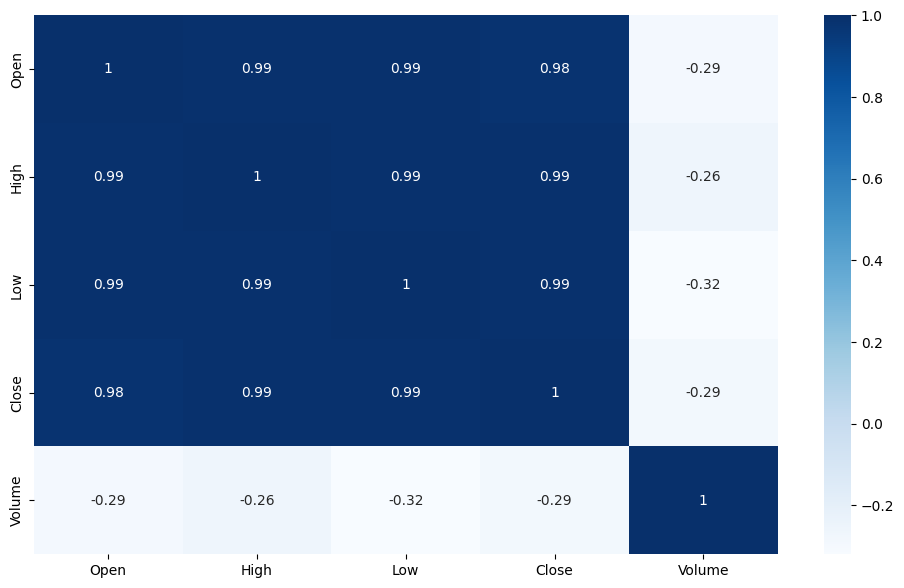

In [ ]:
plt.figure(figsize = (12, 7))
sns.heatmap(df_iqvia[specific_columns].corr(), cmap = 'Blues', annot = True)

In [ ]:
# Again there are generally high correlations throughout

<Figure size 600x400 with 0 Axes>

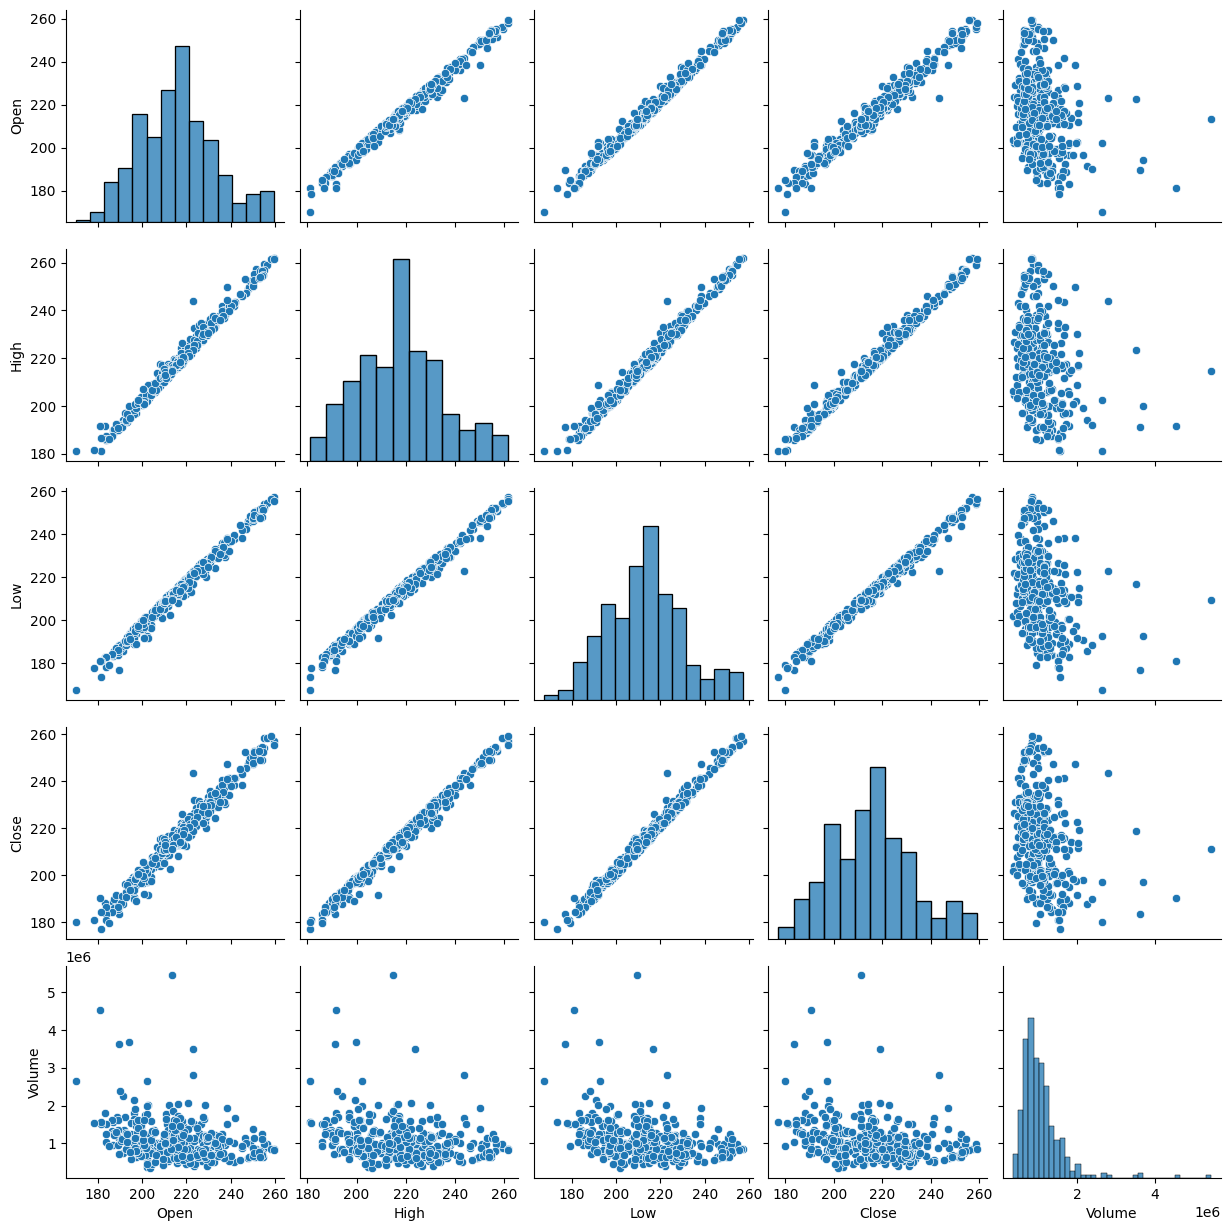

In [ ]:
plt.figure(figsize = (6,4))
sns.pairplot(df_iqvia)

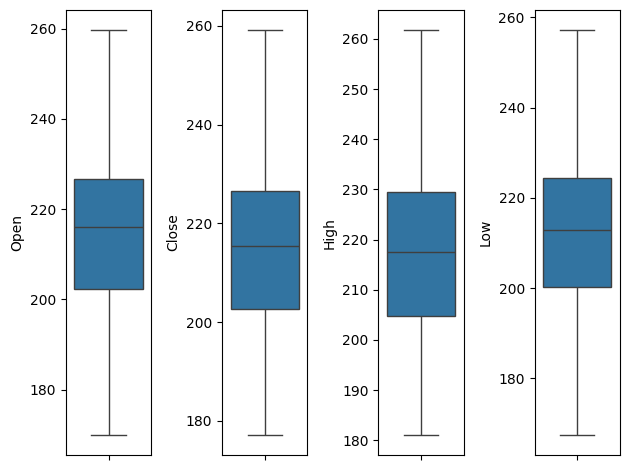

In [ ]:
f, axes = plt.subplots(1,4)
sns.boxplot( y = 'Open', data = df_iqvia, ax = axes[0])
sns.boxplot( y = 'Close', data = df_iqvia, ax = axes[1])
sns.boxplot( y = 'High', data = df_iqvia, ax = axes[2])
sns.boxplot( y = 'Low', data = df_iqvia, ax = axes[3])
plt.tight_layout()

In [ ]:
# no real outliers however the median value is fluctuating more

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data = [go.Candlestick(x=df_iqvia['Date'],
                                          open = df_iqvia['Open'],
                                          close = df_iqvia['Close'],
                                          low = df_iqvia['Low'],
                                          high = df_iqvia['High'])])
figure.update_layout(title = 'IQVIA Stock Price Analysis', xaxis_rangeslider_visible = False)
figure.show()

### IQVIA train_test_split

In [ ]:
x_iqvia = df_iqvia[['Open', 'High', 'Low', 'Volume']]
y_iqvia = df_iqvia['Close']

In [ ]:
x_train_iqvia = x_iqvia.iloc[:311]
y_train_iqvia = y_iqvia.iloc[:311]
x_test_iqvia = x_iqvia.iloc[311:]
y_test_iqvia = y_iqvia.iloc[311:]

In [ ]:
print('Train:', x_train_iqvia.shape)
print('Test:', x_test_iqvia.shape)

Train: (311, 4)
Test: (78, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

In [ ]:
regressor_iqvia = LinearRegression()

regressor_iqvia = regressor_iqvia.fit(x_train_iqvia, y_train_iqvia)

In [ ]:
y_pred_iqvia = regressor_iqvia.predict(x_test_iqvia)

In [ ]:
print('Model Coefficients:', regressor_iqvia.coef_)
print('Model Intercept:', regressor_iqvia.intercept_)

Model Coefficients: [-6.07940432e-01  7.95368669e-01  8.04806846e-01  7.06588529e-08]
Model Intercept: 1.764355588611437


### IQVIA Actual VS Predicted Prices

In [ ]:
pd.set_option('display.max_rows', None)
drame_iqvia = pd.DataFrame(y_test_iqvia, y_pred_iqvia)
dfr_iqvia = pd.DataFrame({'Actual Price': y_test_iqvia, 'Predicted Price': y_pred_iqvia})
print(dfr_iqvia)

     Actual Price  Predicted Price
311    257.179993       259.122281
312    258.579987       256.990931
313    259.100006       259.516083
314    255.649994       257.685553
315    254.259995       253.813002
316    252.710007       254.050371
317    253.869995       253.146874
318    254.160004       254.473122
319    252.720001       252.600741
320    254.559998       254.253601
321    252.410004       251.726171
322    248.880005       249.485192
323    247.740005       248.242688
324    252.570007       251.064292
325    252.889999       249.586852
326    248.869995       248.966113
327    245.509995       243.557175
328    242.979996       243.234451
329    238.529999       240.322738
330    241.449997       240.493430
331    241.500000       241.060259
332    245.330002       246.290961
333    239.410004       239.117179
334    238.020004       238.852059
335    234.229996       234.605463
336    231.160004       231.433040
337    229.139999       229.687164
338    227.250000   

In [ ]:
dfr_iqvia.describe()

Actual Price  Predicted Price
count     78.000000        78.000000
mean     232.299487       232.311893
std       13.890826        13.986424
min      211.179993       210.246852
25%      220.902503       220.015541
50%      230.614998       230.450444
75%      241.487499       242.204439
max      259.100006       259.516083

In [ ]:
regression_confidence_iqvia = regressor_iqvia.score(x_test_iqvia, y_test_iqvia)
print('Linear Regression Confidence:', regression_confidence_iqvia)

Linear Regression Confidence: 0.990408733107907


In [ ]:
# Highly accurate just like the other one

In [ ]:
import plotly.graph_objects as go

x_graph_comp_iqvia = dfr_iqvia.index
y1_graph_comp_iqvia = dfr_iqvia['Actual Price']
y2_graph_comp_iqvia = dfr_iqvia['Predicted Price']

trace1 = go.Scatter(x=x_graph_comp_iqvia, y=y1_graph_comp_iqvia, mode='lines',
                    name='Line 1', line=dict(color='red'))
trace2 = go.Scatter(x=x_graph_comp_iqvia, y=y2_graph_comp_iqvia, mode='lines',
                    name='Line 2', line=dict(color='blue'))

fig = go.Figure(data = [trace1, trace2])

fig.update_layout(
    title='Predicted Prices Compared to Actual Prices',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    title_x = 0.5,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    legend_title_text='Lines'
)

fig.show()

## Goldman Sachs Inc


In [ ]:
df_gdsc = pd.read_csv(goldman_sachs)
df_gdsc.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-12-09  356.709991  361.640015  356.209991  359.140015  343.578430   
1  2022-12-12  358.570007  364.010010  356.339996  363.179993  347.443359   
2  2022-12-13  374.630005  378.559998  365.510010  368.690002  352.714600   
3  2022-12-14  367.010010  368.829987  359.450012  360.380005  344.764740   
4  2022-12-15  354.480011  356.109985  347.940002  349.829987  334.671814   

    Volume  
0  1588800  
1  1750400  
2  3062600  
3  2519700  
4  3163700

In [ ]:
df_gdsc = df_gdsc.drop(columns = 'Adj Close')
df_gdsc.head()

Date        Open        High         Low       Close   Volume
0  2022-12-09  356.709991  361.640015  356.209991  359.140015  1588800
1  2022-12-12  358.570007  364.010010  356.339996  363.179993  1750400
2  2022-12-13  374.630005  378.559998  365.510010  368.690002  3062600
3  2022-12-14  367.010010  368.829987  359.450012  360.380005  2519700
4  2022-12-15  354.480011  356.109985  347.940002  349.829987  3163700

In [ ]:
df_gdsc.duplicated().values.any()

False

In [ ]:
df_gdsc.isnull().values.any()

False

In [ ]:
df_gdsc.describe()

Open        High         Low       Close        Volume
count  389.000000  389.000000  389.000000  389.000000  3.890000e+02
mean   361.119769  364.757789  357.986273  361.452493  2.314838e+06
std     42.882280   43.322676   42.835625   43.151612  1.230073e+06
min    293.450012  298.269989  289.359985  289.910004  4.601000e+05
25%    326.149994  329.329987  323.670013  326.799988  1.654200e+06
50%    347.299988  351.679993  343.899994  349.100006  2.033100e+06
75%    384.600006  388.660004  382.029999  385.959991  2.611000e+06
max    468.200012  471.480011  464.250000  470.410004  1.444830e+07

In [ ]:
print(df_gdsc[specific_columns].corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.997870  0.997901  0.994983 -0.018334
High    0.997870  1.000000  0.998002  0.998006 -0.002646
Low     0.997901  0.998002  1.000000  0.997963 -0.041279
Close   0.994983  0.998006  0.997963  1.000000 -0.025273
Volume -0.018334 -0.002646 -0.041279 -0.025273  1.000000


<Axes: >

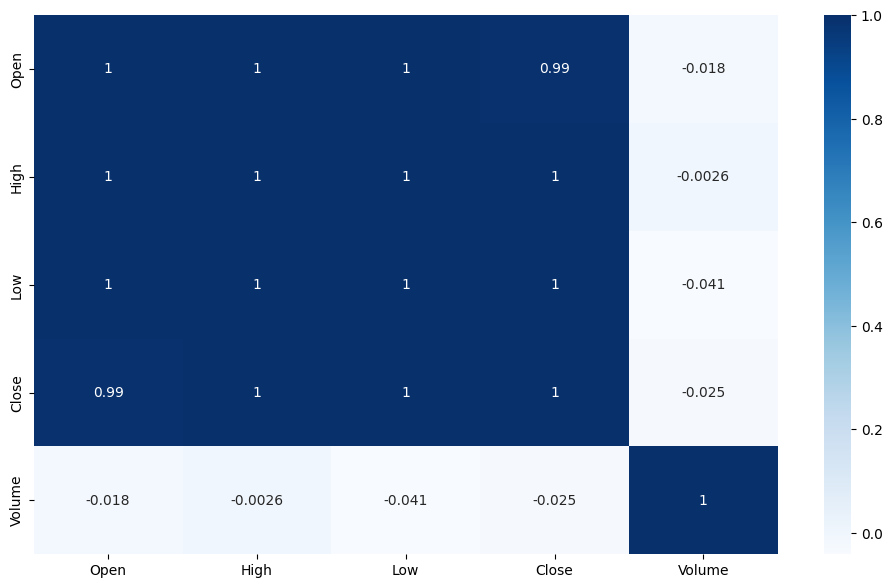

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df_gdsc[specific_columns].corr(), cmap = 'Blues', annot = True)

<Figure size 600x400 with 0 Axes>

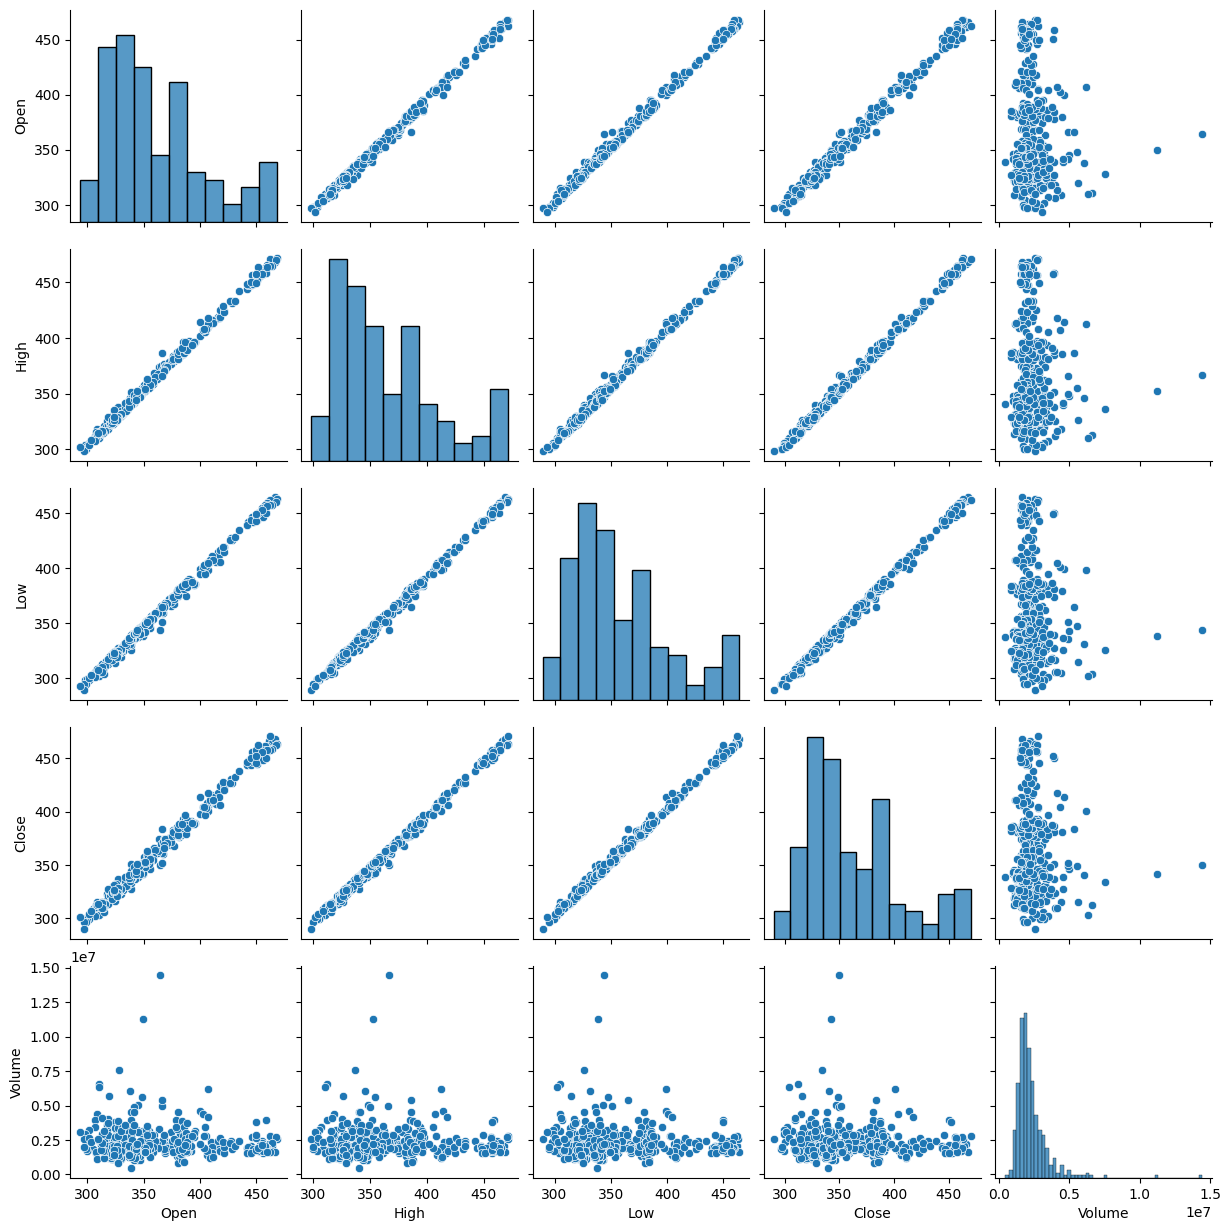

In [ ]:
plt.figure(figsize = (6,4))
sns.pairplot(df_gdsc)

In [ ]:
# highly correlated so strong general correlation

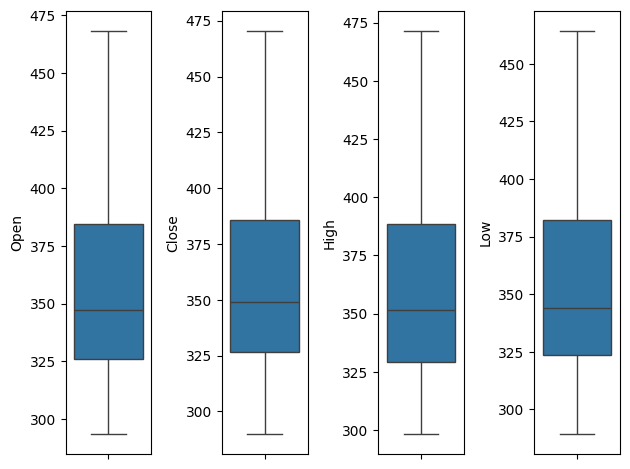

In [ ]:
f, axes = plt.subplots(1,4)
sns.boxplot( y = 'Open', data = df_gdsc, ax = axes[0])
sns.boxplot( y = 'Close', data = df_gdsc, ax = axes[1])
sns.boxplot( y = 'High', data = df_gdsc, ax = axes[2])
sns.boxplot( y= 'Low', data = df_gdsc, ax = axes[3])
plt.tight_layout()

In [ ]:
# All values are within close range of eachother

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data = [go.Candlestick(x=df_gdsc['Date'],
                                          open = df_gdsc['Open'],
                                          close = df_gdsc['Close'],
                                          high = df_gdsc['High'],
                                          low = df_gdsc['Low'])])
figure.update_layout(title = 'Goldman Sachs Stock Price Analysis',
                     xaxis_rangeslider_visible = False,
                     title_x = 0.5)
figure.show()

### Goldman Sachs train_test_split

In [ ]:
x_gdsc = df_gdsc[['Open', 'High', 'Low', 'Volume']]
y_gdsc = df_gdsc['Close']

In [ ]:
x_train_gdsc = x_gdsc.iloc[:311]
y_train_gdsc = y_gdsc.iloc[:311]
x_test_gdsc = x_gdsc.iloc[311:]
y_test_gdsc = y_gdsc.iloc[311:]

In [ ]:
print('Train:', x_train_gdsc.shape)
print('Test', x_test_gdsc.shape)

Train: (311, 4)
Test (78, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm

In [ ]:
regressor_gdsc = LinearRegression()

regressor_gdsc = regressor_gdsc.fit(x_train_gdsc, y_train_gdsc)

In [ ]:
y_pred_gdsc = regressor_gdsc.predict(x_test_gdsc)

In [ ]:
print('Model Coefficients:', regressor_gdsc.coef_)
print('Model Intercept:', regressor_gdsc.intercept_)

Model Coefficients: [-5.58269052e-01  7.81863630e-01  7.73455546e-01 -3.91772752e-08]
Model Intercept: 1.0540033447312567


### Goldman Sachs Actual VS Predicted Prices

In [ ]:
pd.set_option('display.max_rows', None)
dframe_gdsc = pd.DataFrame(y_test_gdsc, y_pred_gdsc)
dfr_gdsc = pd.DataFrame({'Actual Price': y_test_gdsc, 'Predicted Price': y_pred_gdsc})
print(dfr_gdsc)

     Actual Price  Predicted Price
311    386.989990       392.397017
312    386.160004       382.812916
313    388.179993       385.674369
314    392.309998       393.116279
315    388.609985       388.780816
316    387.209991       388.486020
317    384.369995       384.720683
318    388.660004       388.886094
319    396.470001       393.839430
320    413.709991       410.079577
321    406.820007       409.323814
322    404.940002       407.136590
323    406.179993       407.209862
324    415.250000       412.996179
325    417.690002       417.328275
326    413.510010       413.805035
327    410.149994       409.991716
328    414.000000       415.182807
329    406.250000       409.022539
330    408.070007       404.428649
331    410.540009       410.383828
332    410.709991       409.188575
333    400.760010       399.725931
334    397.480011       396.679127
335    389.489990       389.178053
336    400.880005       404.773527
337    396.859985       397.412009
338    403.910004   

In [ ]:
dfr_gdsc.describe()

Actual Price  Predicted Price
count     78.000000        78.000000
mean     430.873204       430.804119
std       26.680089        26.636189
min      384.369995       382.812916
25%      406.392502       407.663031
50%      435.375000       435.903119
75%      455.494996       454.783556
max      470.410004       468.888371

In [ ]:
regression_confidence_gdsc = regressor_gdsc.score(x_test_gdsc, y_test_gdsc)
print('Linear Regression Confidence:', regression_confidence_gdsc)

Linear Regression Confidence: 0.9940955149981264


In [ ]:
# model is highly accurate

In [ ]:
import plotly.graph_objects as go

x_graph_comp_gdsc = dfr_gdsc.index
y1_graph_comp_gdsc = dfr_gdsc['Actual Price']
y2_graph_comp_gdsc = dfr_gdsc['Predicted Price']

trace1 = go.Scatter(x=x_graph_comp_gdsc, y=y1_graph_comp_gdsc, mode='lines',
                    name='Line 1', line=dict(color='red'))
trace2 = go.Scatter(x=x_graph_comp_gdsc, y=y2_graph_comp_gdsc, mode='lines',
                    name='Line 2', line=dict(color='blue'))

fig = go.Figure(data = [trace1, trace2])

fig.update_layout(
    title='Predicted Prices Compared to Actual Prices',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    title_x = 0.5,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    legend_title_text='Lines'
)

fig.show()

## NVIDIA

In [ ]:
df_nvidia = pd.read_csv(nvidia)
df_nvidia.head()

Date       Open       High        Low      Close  Adj Close  \
0  2022-12-09  17.160000  17.583000  16.975000  17.000999  16.991266   
1  2022-12-12  17.037001  17.538000  16.797001  17.535000  17.524961   
2  2022-12-13  18.531000  18.790001  17.711000  18.072001  18.061655   
3  2022-12-14  17.987000  18.252001  17.420000  17.674000  17.663879   
4  2022-12-15  17.146000  17.320000  16.700001  16.952000  16.942295   

      Volume  
0  465338000  
1  457328000  
2  656589000  
3  496888000  
4  478542000

In [ ]:
df_nvidia.shape

(389, 7)

In [ ]:
df_nvidia = df_nvidia.drop(columns = 'Adj Close')
df_nvidia.head()

Date       Open       High        Low      Close     Volume
0  2022-12-09  17.160000  17.583000  16.975000  17.000999  465338000
1  2022-12-12  17.037001  17.538000  16.797001  17.535000  457328000
2  2022-12-13  18.531000  18.790001  17.711000  18.072001  656589000
3  2022-12-14  17.987000  18.252001  17.420000  17.674000  496888000
4  2022-12-15  17.146000  17.320000  16.700001  16.952000  478542000

In [ ]:
df_nvidia.duplicated().values.any()

False

In [ ]:
df_nvidia.isnull().values.any()

False

In [ ]:
df_nvidia.describe()

Open        High         Low       Close        Volume
count  389.000000  389.000000  389.000000  389.000000  3.890000e+02
mean    51.803326   52.719990   50.846962   51.860424  4.755743e+08
std     28.593310   29.126566   27.918420   28.561901  1.553692e+08
min     13.927000   14.262000   13.884000   14.036000  1.982090e+08
25%     27.840000   28.367001   27.472000   27.965000  3.780130e+08
50%     45.111000   45.935001   44.502998   45.460999  4.396240e+08
75%     69.629997   70.220001   67.599998   69.452003  5.301420e+08
max    139.800003  140.759995  130.690002  135.580002  1.543911e+09

In [ ]:
print(df_nvidia[specific_columns].corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.999642  0.999366  0.998695  0.003497
High    0.999642  1.000000  0.999458  0.999313  0.009446
Low     0.999366  0.999458  1.000000  0.999597 -0.009206
Close   0.998695  0.999313  0.999597  1.000000 -0.003497
Volume  0.003497  0.009446 -0.009206 -0.003497  1.000000


<Axes: >

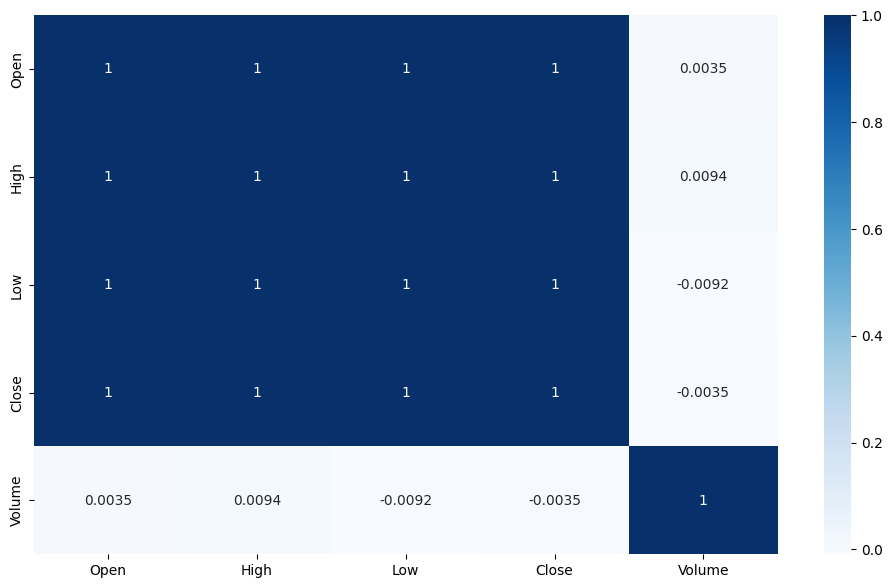

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df_nvidia[specific_columns].corr(), cmap = 'Blues', annot = True)

In [ ]:
# All have extremely high correlations allowing for easier extrapolation

<Figure size 600x400 with 0 Axes>

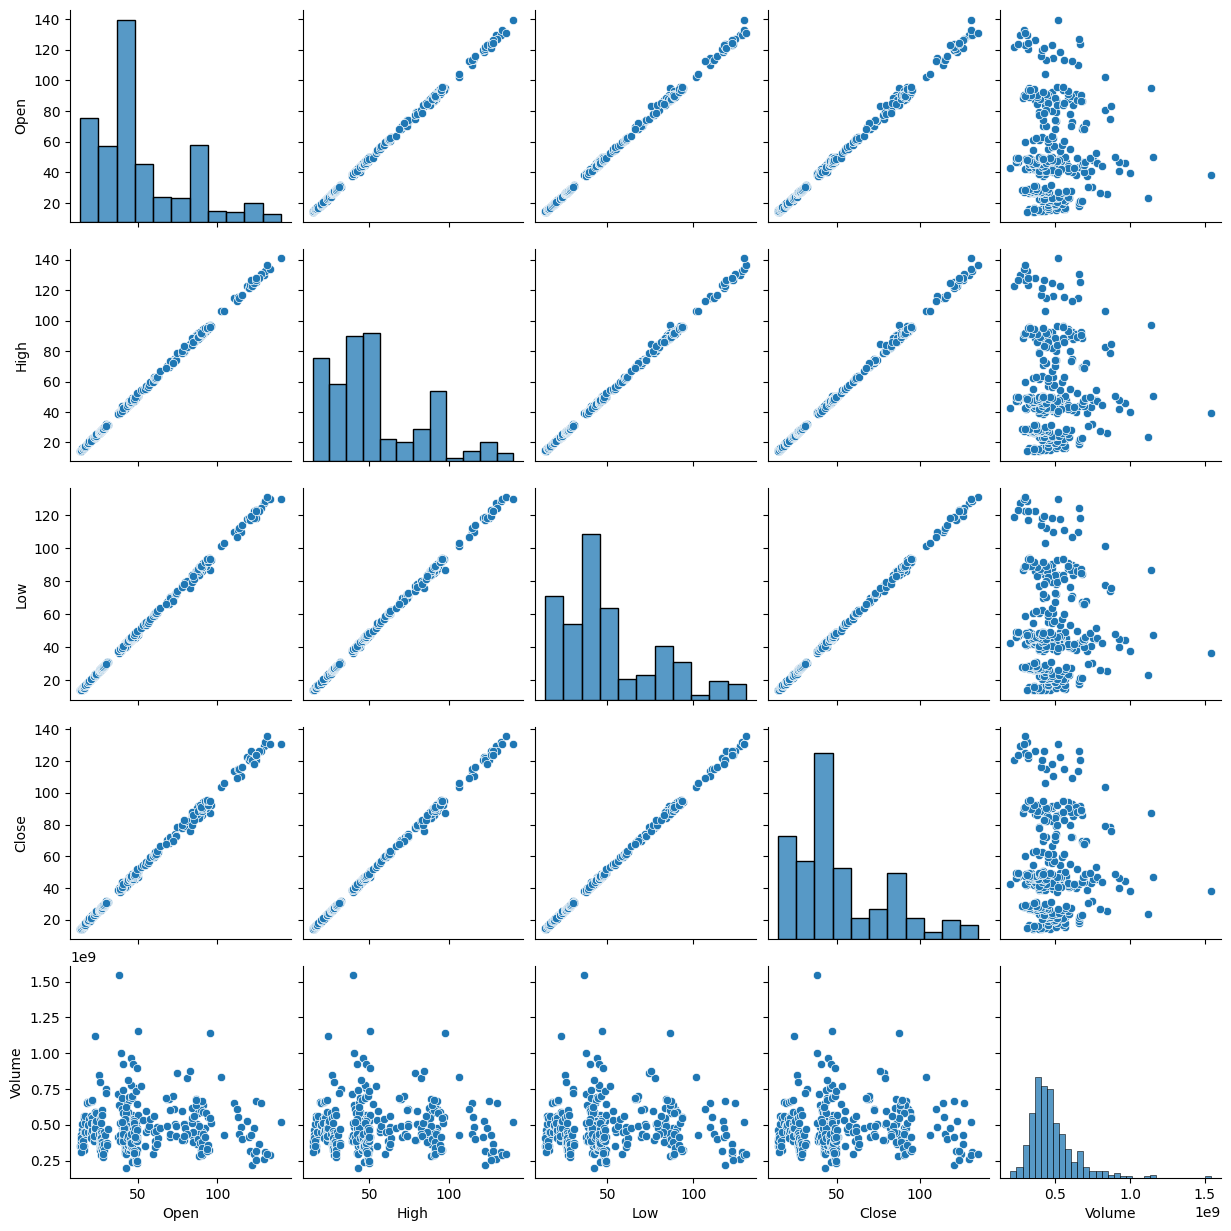

In [ ]:
plt.figure(figsize = (6,4))
sns.pairplot(df_nvidia)

In [ ]:
# We can generally visualize the strong correlation

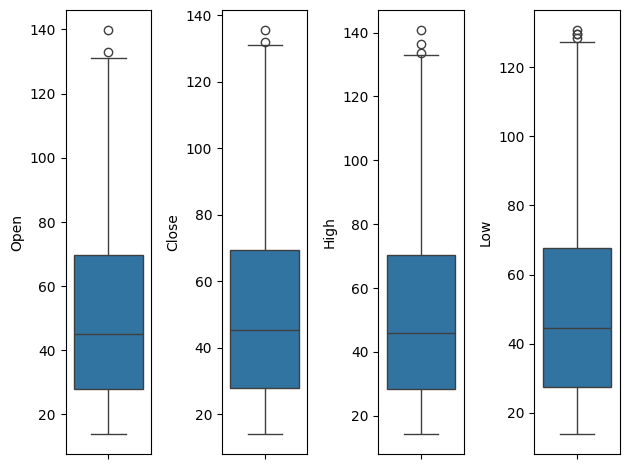

In [ ]:
f, axes = plt.subplots(1,4)
sns.boxplot( y = 'Open', data = df_nvidia, ax = axes[0])
sns.boxplot( y = 'Close', data = df_nvidia, ax = axes[1])
sns.boxplot( y = 'High', data = df_nvidia, ax = axes[2])
sns.boxplot( y = 'Low', data = df_nvidia, ax = axes[3])
plt.tight_layout()

In [ ]:
# generally all the data points are within the same range and all the outliers
# are bunched together similarly

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data = [go.Candlestick(x=df_nvidia['Date'],
                                          open = df_nvidia['Open'],
                                          close = df_nvidia['Close'],
                                          high = df_nvidia['High'],
                                          low = df_nvidia['Low'])])
figure.update_layout(title = 'NVIDIA Stock Price Analysis',
                     xaxis_rangeslider_visible = False,
                     title_x = 0.5)
figure.show()

### NVIDIA train_test_split

In [ ]:
x_nvidia = df_nvidia[['Open', 'High', 'Low', 'Volume']]
y_nvidia = df_nvidia['Close']

In [ ]:
x_train_nvidia = x_nvidia.iloc[:311]
y_train_nvidia = y_nvidia.iloc[:311]
x_test_nvidia = x_nvidia.iloc[311:]
y_test_nvidia = y_nvidia.iloc[311:]

In [ ]:
print('Train:', x_train_nvidia.shape)
print('Test:', x_test_nvidia.shape)

Train: (311, 4)
Test: (78, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm

In [ ]:
regressor_nvidia = LinearRegression()

regressor_nvidia = regressor_nvidia.fit(x_train_nvidia, y_train_nvidia)

In [ ]:
y_pred_nvidia = regressor_nvidia.predict(x_test_nvidia)

In [ ]:
y_pred_nvidia.shape

(78,)

In [ ]:
print('Model Coefficients:', regressor_nvidia.coef_)
print('Model Intercept:', regressor_nvidia.intercept_)

Model Coefficients: [-5.95955437e-01  8.65500858e-01  7.31511076e-01 -1.85661819e-10]
Model Intercept: 0.021694110522403776


### NVIDIA Actual VS Predicted Prices

In [ ]:
pd.set_option('display.max_rows', None)
drame_nvidia = pd.DataFrame(y_test_nvidia, y_pred_nvidia)
dfr_nvidia = pd.DataFrame({'Actual Price': y_test_nvidia, 'Predicted Price': y_pred_nvidia})
print(dfr_nvidia)

     Actual Price  Predicted Price
311     87.528000        90.691490
312     85.774002        86.810153
313     91.913002        90.035514
314     90.888000        89.526913
315     87.944000        88.329017
316     87.836998        88.696169
317     88.455002        89.710518
318     89.398003        88.779230
319     90.372002        89.203779
320     91.434998        91.245003
321     94.289001        94.073306
322     95.001999        96.089190
323     92.560997        93.882288
324     90.250000        90.316042
325     90.356003        90.570802
326     90.362999        91.198041
327     89.452003        89.301664
328     88.963997        90.104821
329     85.904999        87.328968
330     88.008003        87.615433
331     87.133003        87.435729
332     85.353996        84.396353
333     87.039001        86.804181
334     90.615997        89.965147
335     88.185997        88.561554
336     86.000999        88.124638
337     87.415001        87.665672
338     84.035004   

In [ ]:
dfr_nvidia.describe()

Actual Price  Predicted Price
count     78.000000        78.000000
mean      99.019552        99.143293
std       16.264033        16.209506
min       76.199997        78.555171
25%       87.777002        88.175733
50%       90.751998        90.820674
75%      114.593998       113.675752
max      135.580002       135.408370

In [ ]:
regression_confidence_nvidia = regressor_nvidia.score(x_test_nvidia, y_test_nvidia)
print('Linear Regression Confidence:', regression_confidence_nvidia)

Linear Regression Confidence: 0.9951563434698102


In [ ]:
import plotly.graph_objects as go

x_graph_comp_nvidia = dfr_nvidia.index
y1_graph_comp_nvidia = dfr_nvidia['Actual Price']
y2_graph_comp_nvidia = dfr_nvidia['Predicted Price']

trace1 = go.Scatter(x=x_graph_comp_nvidia, y=y1_graph_comp_nvidia, mode='lines',
                    name='Line 1', line=dict(color='red'))
trace2 = go.Scatter(x=x_graph_comp_nvidia, y=y2_graph_comp_nvidia, mode='lines',
                    name='Line 2', line=dict(color='blue'))

fig = go.Figure(data = [trace1, trace2])

fig.update_layout(
    title='Predicted Prices Compared to Actual Prices',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    title_x = 0.5,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    legend_title_text='Lines'
)

fig.show()

## AT&T Inc

In [ ]:
df_at_t = pd.read_csv(at_t)
df_at_t.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2022-12-09  19.070000  19.350000  19.030001  19.090000  17.317554  29815600
1  2022-12-12  19.139999  19.309999  19.070000  19.299999  17.508057  31333500
2  2022-12-13  19.410000  19.500000  19.070000  19.120001  17.344772  54142100
3  2022-12-14  19.049999  19.100000  18.760000  18.900000  17.145195  44027700
4  2022-12-15  18.639999  18.809999  18.360001  18.469999  16.755121  47277400

In [ ]:
df_at_t = df_at_t.drop(columns = 'Adj Close')
df_at_t.head()

Date       Open       High        Low      Close    Volume
0  2022-12-09  19.070000  19.350000  19.030001  19.090000  29815600
1  2022-12-12  19.139999  19.309999  19.070000  19.299999  31333500
2  2022-12-13  19.410000  19.500000  19.070000  19.120001  54142100
3  2022-12-14  19.049999  19.100000  18.760000  18.900000  44027700
4  2022-12-15  18.639999  18.809999  18.360001  18.469999  47277400

In [ ]:
df_at_t.duplicated().values.any()

False

In [ ]:
df_at_t.isnull().values.any()

False

In [ ]:
df_at_t.describe()

Open        High         Low       Close        Volume
count  389.000000  389.000000  389.000000  389.000000  3.890000e+02
mean    16.889640   17.046735   16.745476   16.899023  3.798554e+07
std      1.603812    1.623483    1.595395    1.614399  1.731972e+07
min     13.530000   13.990000   13.430000   13.450000  1.243100e+07
25%     15.670000   15.800000   15.550000   15.670000  2.828130e+07
50%     16.950001   17.080000   16.809999   16.940001  3.304860e+07
75%     18.129999   18.320000   17.900000   18.129999  4.121510e+07
max     20.469999   21.530001   20.070000   20.420000  1.609334e+08

In [ ]:
print(df_at_t[specific_columns].corr())
# Generall accurate for all of the values

            Open      High       Low     Close    Volume
Open    1.000000  0.994190  0.996466  0.992951 -0.199581
High    0.994190  1.000000  0.993997  0.994520 -0.181598
Low     0.996466  0.993997  1.000000  0.997683 -0.230110
Close   0.992951  0.994520  0.997683  1.000000 -0.213885
Volume -0.199581 -0.181598 -0.230110 -0.213885  1.000000


<Axes: >

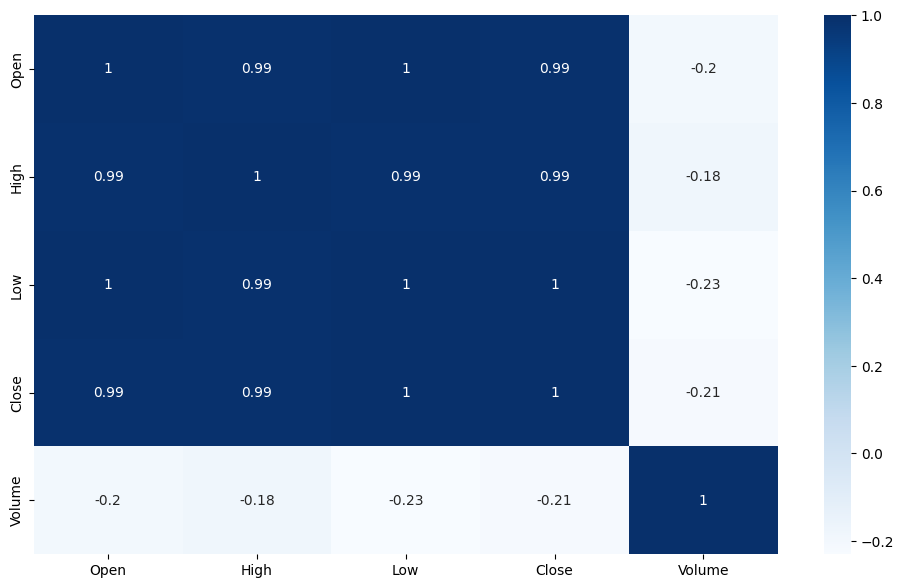

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df_at_t[specific_columns].corr(), cmap = 'Blues', annot = True)

In [ ]:
# We can see that all the columns have really high correlations

<Figure size 600x400 with 0 Axes>

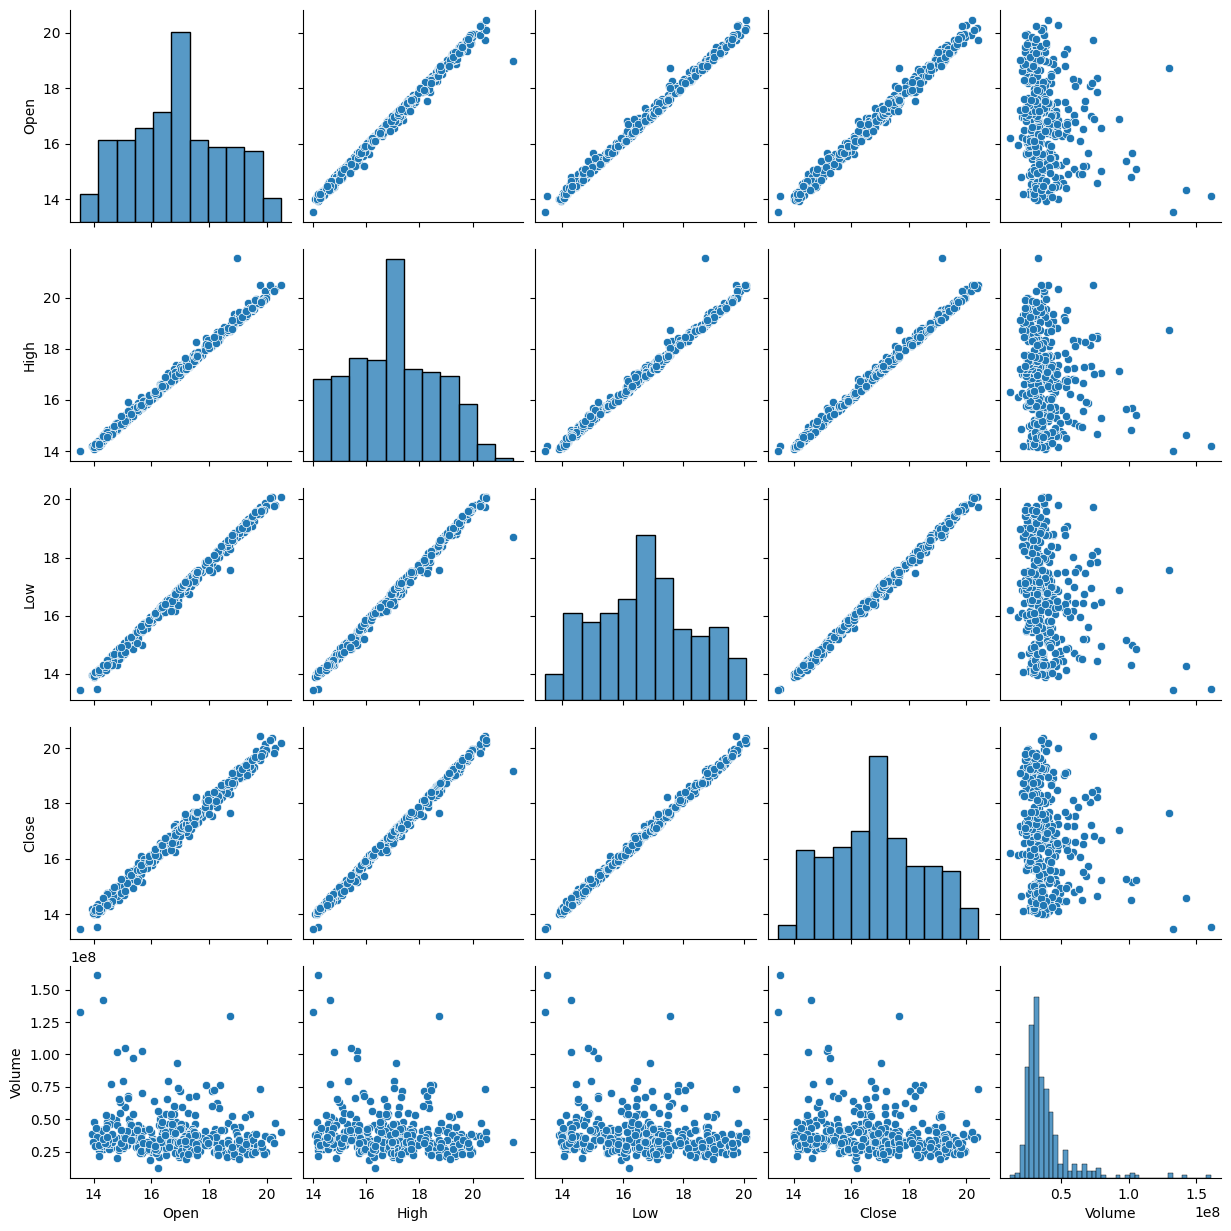

In [ ]:
plt.figure(figsize = (6,4))
sns.pairplot(df_at_t)

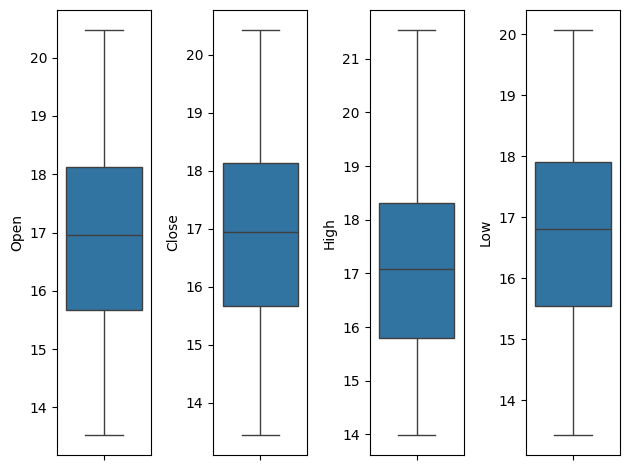

In [ ]:
f, axes = plt.subplots(1,4)
sns.boxplot( y = 'Open', data = df_at_t, ax = axes[0])
sns.boxplot( y = 'Close', data = df_at_t, ax = axes[1])
sns.boxplot( y = 'High', data = df_at_t, ax = axes[2])
sns.boxplot( y = 'Low', data = df_at_t, ax = axes[3])
plt.tight_layout()

In [ ]:
# No general outliers, all the data is strongly correlated

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data = [go.Candlestick(x = df_at_t['Date'],
                                          open = df_at_t['Open'],
                                          close = df_at_t['Close'],
                                          high = df_at_t['High'],
                                          low = df_at_t['Low'])])
figure.update_layout(title = 'AT&T Stock Price Analysis', xaxis_rangeslider_visible = False,
                     title_x = 0.5)
figure.show()

### AT&T train_test_split

In [ ]:
x_at_t = df_at_t[['Open', 'High', 'Low', 'Volume']]
y_at_t = df_at_t['Close']

In [ ]:
x_train_at_t = x_at_t.iloc[:311]
y_train_at_t = y_at_t.iloc[:311]
x_test_at_t = x_at_t.iloc[311:]
y_test_at_t = y_at_t.iloc[311:]

In [ ]:
print('Train:', x_train_at_t.shape)
print('Test:', x_test_at_t.shape)

Train: (311, 4)
Test: (78, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

In [ ]:
regressor_at_t = LinearRegression()

regressor_at_t = regressor_at_t.fit(x_train_at_t, y_train_at_t)

In [ ]:
y_pred_at_t = regressor_at_t.predict(x_test_at_t)

In [ ]:
y_pred_at_t.shape

(78,)

In [ ]:
print('Model Coefficients:', regressor_at_t.coef_)
print('Model Intercept:', regressor_at_t.intercept_)

Model Coefficients: [-3.83001336e-01  2.54347321e-01  1.13910103e+00  1.21328153e-09]
Model Intercept: -0.08905836921655208


### AT&T Actual VS Predicted Values

In [ ]:
pd.set_option('display.max_rows', None)
dframe_at_t = pd.DataFrame(y_test_at_t, y_pred_at_t)
dfr_at_t = pd.DataFrame({'Actual Price': y_test_at_t, 'Predicted Price': y_pred_at_t})
print(dfr_at_t)

     Actual Price  Predicted Price
311     17.200001        17.161550
312     17.330000        17.402637
313     17.200001        17.300721
314     17.190001        17.281819
315     17.010000        16.925862
316     17.049999        17.153933
317     17.299999        17.094574
318     17.170000        17.269009
319     17.209999        17.247695
320     17.160000        17.194582
321     16.980000        17.075578
322     17.120001        17.109656
323     17.180000        17.207020
324     17.549999        17.503359
325     17.600000        17.688865
326     17.500000        17.362784
327     17.520000        17.678249
328     17.610001        17.647610
329     17.570000        17.751444
330     17.420000        17.391488
331     17.250000        17.336151
332     16.900000        16.932257
333     16.730000        16.612434
334     16.420000        16.527489
335     16.309999        16.373510
336     16.240000        16.236178
337     16.090000        16.052379
338     16.120001   

In [ ]:
dfr_at_t.describe()

Actual Price  Predicted Price
count     78.000000        78.000000
mean      17.355128        17.354285
std        0.646975         0.639552
min       16.090000        16.052379
25%       16.995000        17.052409
50%       17.270000        17.302026
75%       17.617501        17.661729
max       19.110001        19.032591

In [ ]:
regression_confidence_at_t = regressor_at_t.score(x_test_at_t, y_test_at_t)
print('Linear Regression Confidence:', regression_confidence_at_t)

Linear Regression Confidence: 0.9760043750430967


In [ ]:
import plotly.graph_objects as go

x_graph_comp_at_t = dfr_at_t.index
y1_graph_comp_at_t = dfr_at_t['Actual Price']
y2_graph_comp_at_t = dfr_at_t['Predicted Price']

trace1 = go.Scatter(x=x_graph_comp_at_t, y=y1_graph_comp_at_t, mode='lines',
                    name='Line 1', line=dict(color='red'))
trace2 = go.Scatter(x=x_graph_comp_at_t, y=y2_graph_comp_at_t, mode='lines',
                    name='Line 2', line=dict(color='blue'))

fig = go.Figure(data = [trace1, trace2])

fig.update_layout(
    title='Predicted Prices Compared to Actual Prices',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    title_x = 0.5,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    legend_title_text='Lines'
)

fig.show()